## Lab One: Visualization and Data Preprocessing

## Setup and Data Import

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

%matplotlib inline

In [99]:
df = pd.read_csv('data/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv')
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

## Business Understanding

##### *Describe the purpose of the data set you selected (i.e. why was this data collected in the first place?).*

The dataset comprises 101,766 hospital records of inpatients diagnosed with diabetes who had hospital stays of 1-14 days, collected from 130 U.S. hospitals between 1999 and 2008. While evidence highlights the benefits of preventative and therapeutic interventions in improving outcomes for diabetic patients, diabetes care during hospital stays often appears inconsistent. This dataset was collected to study early readmission rates within 30 days of discharge, aiming to enhance patient outcomes, reduce morbidity and mortality, and lower hospital management costs.

**Source:** Strack, B., et al. (2014). *UCI Machine Learning Repository: Diabetes 130-US hospitals for years 1999–2008 Data Set.* Retrieved from [https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

##### *Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?*

The main goal of this dataset is to accurately classify hospital readmissions into three categories: within 30 days, after 30 days, or no readmission. This is important because high readmission rates lead to higher healthcare costs, worse patient outcomes, and added pressure on hospital resources. Identifing variables associated with readmission risk provide valuable information to providers for providing targeted treatments. Identifying these variables to achieve good model performace will indicate that we have extracted useful insights from these data. 

##### *How would you measure the effectiveness of a good prediction algorithm? Be specific.*

A good prediction algorithm for this objective should prioritize Sensitivity, ensuring it correctly identifies patients at risk of early readmission. This is critical for enabling early interventions and preventative treatments. Once a predefined Sensitivity threshold is achieved (e.g. ~80%), the algorithm's Positive Predictive Value (PPV) should then be optimized to minimize false positives, ensuring resources are efficiently allocated and unnecessary treatments are avoided

We will also split the data into training and validation sets, using cross-validation to evaluate the algorithm's performance on unseen data.

## Data Understanding

##### *Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

### Data Attributes

1. **ID Variables**
   - **encounter_id**: Unique identifier of an encounter.
   - **patient_nbr**: Unique identifier of a patient.  
2. **Demographic Variables**
   - **race**: Patient's race (Categorical Levels: Caucasian, Asian, African American, Hispanic, other).
   - **gender**: Patient's gender (Categorical Levels: male, female, unknown/invalid).
   - **age**: Age grouped in 10-year intervals (Categorical Levels: [0-10), [10-20), ..., [90-100)).
   - **weight**: Patient's weight in pounds (Categorical).  
3. **Admission and Discharge Details**
   - **admission_type_id**: Type of admission (Categorical: 9 integer levels representing e.g., Emergency, Urgent, Elective).
   - **discharge_disposition_id**: Type of discharge (Categorical: 29 integer levels representing e.g., Discharged to home, Expired).
   - **admission_source_id**: Source of admission (Categorical: 21 integer levels representing e.g., Physician Referral, Emergency Room).  
4. **Encounter Information**
   - **time_in_hospital**: Number of days in the hospital (Continuous).
   - **payer_code**: Payer for medical services (Categorical: 23 integer levels representing e.g., Blue Cross, Medicare).
   - **medical_specialty**: Specialty of admitting physician (Categorical: 84 integer levels representing e.g., Cardiology, Internal Medicine).  
5. **Medical History and Diagnostics**
   - **num_lab_procedures**: Number of lab tests performed (Continuous).
   - **num_procedures**: Number of procedures performed (excluding lab tests) (Continuous).
   - **num_medications**: Number of distinct medications administered (Continuous).
   - **number_outpatient**: Number of outpatient visits in the prior year (Continuous).
   - **number_emergency**: Number of emergency visits in the prior year (Continuous).
   - **number_inpatient**: Number of inpatient visits in the prior year (Continuous).
   - **diag_1**, **diag_2**, **diag_3**: Primary and secondary diagnoses (ICD-9 codes) (Categorical: integer values representing 848, 923, and 954 levels, respectively).
   - **number_diagnoses**: Total number of diagnoses recorded (Continuous).  
6. **Lab Results**
   - **max_glu_serum**: Glucose serum test results (Categorical Levels: >200, >300, normal, none).
   - **A1Cresult**: Hemoglobin A1c test results (Categorical Levels: >8, >7, normal, none).  
7. **Medications**
   - Variables for medications: Indicate whether prescribed and dosage changes (Categorical Levels: up, down, steady, no).
   - Drug Classes:
     - **Biguanides** reduce glucose production in the liver and improve insulin sensitivity.  
       - **metformin**: a first-line treatment for type 2 diabetes
     - **Meglitinides** stimulate insulin secretion but act faster and have a shorter duration compared to sulfonylureas. 
       - **repaglinide**
       - **nateglinide**
     - **Sulfonylureas** stimulate the pancreas to produce more insulin. These drugs are effective but are older and less commonly used today due to side effects like hypoglycemia and weight gain.  
       - **chlorpropamide**
       - **glimepiride**
       - **acetohexamide**
       - **glipizide**
       - **glyburide**
       - **tolbutamide**
       - **tolazamide**
     - **Thiazolidinediones (TZDs)** improve insulin sensitivity in muscle and fat tissue. They can have serious side effects, including weight gain and fluid retention. (They have been withdrawn in many markets due to evidence of liver toxicity.)
       - **pioglitazone**
       - **rosiglitazone**
       - **troglitazone**
     - **Alpha-Glucosidase Inhibitors** delay carbohydrate digestion and absorption in the intestines, reducing post-meal blood sugar spikes.
       - **acarbose**
       - **miglitol**
     - **DPP-4 Inhibitors** enhance incretin hormone levels to increase insulin release and decrease glucagon.
       - **citoglipton**: An unknown drug and potential error in the dataset; it may be a misspelling of *sitagliptin*.
     - **Insulin and Combinations**: Combination drugs combine two medications to simplify treatment and target multiple mechanisms for blood sugar control.
       - **insulin** directly supplements or replaces natural insulin in the body, essential for type 1 and advanced type 2 diabetes management.
       - **glyburide-metformin**
       - **glipizide-metformin**
       - **glimepiride-pioglitazone**
       - **metformin-rosiglitazone**
       - **metformin-pioglitazone**
     - **Non-Diabetes Medications**
       - **examide** is a diuretic primarily prescribed for cardiovascular or renal issues, not blood sugar control.  
8. **Outcome Variables**
   - **change**: Indicates if diabetic medications were changed during the encounter (Categorical Levels: change, no change).
   - **diabetesMed**: Indicates if diabetic medications were prescribed (Categorical Levels: yes, no).
   - **readmitted**: Readmission status (Target Classes: <30, >30, No).  

---

##### Metadata Categories

1. **admission_type_id**
   - 1: Emergency; 2: Urgent; 3: Elective; 4: Newborn; 5: Not Available; 6: NULL; 7: Trauma Center; 8: Not Mapped    
2. **discharge_disposition_id**
   - 1: Discharged to home; 2: Discharged/transferred to another short-term hospital; 3: Discharged/transferred to SNF; 4: Discharged/transferred to ICF; 5: Discharged/transferred to another type of inpatient care institution; 6: Discharged/transferred to home with home health service; 7: Left AMA; 8: Discharged/transferred to home under care of Home IV provider; 9: Admitted as an inpatient to this hospital; 10: Neonate discharged to another hospital for neonatal aftercare; 11: Expired; 12: Still patient or expected to return for outpatient services; 13: Hospice / home; 14: Hospice / medical facility; 15: Discharged/transferred within this institution to Medicare approved swing bed; 16: Discharged/transferred/referred to another institution for outpatient services; 17: Discharged/transferred/referred to this institution for outpatient services; 18: NULL; 19: Expired at home (Medicaid only, hospice); 20: Expired in a medical facility (Medicaid only, hospice); 21: Expired, place unknown (Medicaid only, hospice); 22: Discharged/transferred to another rehab facility including rehab units of a hospital; 23: Discharged/transferred to a long-term care hospital; 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare; 25: Not Mapped; 26: Unknown/Invalid; 27: Discharged/transferred to a federal health care facility; 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital; 29: Discharged/transferred to a Critical Access Hospital (CAH); 30: Discharged/transferred to another type of health care institution not defined elsewhere 
3. **admission_source_id**
   - 1: Physician Referral; 2: Clinic Referral; 3: HMO Referral; 4: Transfer from a hospital; 5: Transfer from a Skilled Nursing Facility (SNF); 6: Transfer from another health care facility; 7: Emergency Room; 8: Court/Law Enforcement; 9: Not Available; 10: Transfer from critical access hospital; 11: Normal Delivery; 12: Premature Delivery; 13: Sick Baby; 14: Extramural Birth; 15: Not Available; 17: NULL; 18: Transfer from Another Home Health Agency; 19: Readmission to Same Home Health Agency; 20: Not Mapped; 21: Unknown/Invalid; 22: Transfer from hospital inpatient/same facility resulting in a separate claim; 23: Born inside this hospital; 24: Born outside this hospital; 25: Transfer from Ambulatory Surgery Center; 26: Transfer from Hospice  


In [100]:
# # Display the variable metadata in a more readable table format
# metadata = pd.read_csv('data/diabetes+130-us+hospitals+for+years+1999-2008/IDS_mapping.csv')
# print(metadata.to_markdown(index=False))

### Data Cleaning

##### *Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.*

#### Missing Values

In [101]:
# Find `?` values and replace them with NaN
questionmark_sums = (df == '?').sum()
questionmark_sums_nonzero = questionmark_sums[questionmark_sums != 0]
questionmark_sums_nonzero

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [102]:
# Replace `?` with NaN
df_clean = df.replace('?', np.nan)

In [103]:
# Identify missing values
missing_sums = df_clean.isna().sum()
missing_sums_nonzero = missing_sums[missing_sums != 0]

# Calculate percentages
missing_percentages = (missing_sums_nonzero / len(df_clean)) * 100

# Create a DataFrame of missing counts and percentages
missing_summary = pd.DataFrame({
    'Missing Count': missing_sums_nonzero,
    'Missing Percentage': missing_percentages
}).sort_values(by='Missing Count', ascending=False)
missing_sums_nonzero

missing_summary

Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636

In [104]:
# How many missing values are in each weight class?

# Define the order for weight classes
weight_order = [
    "[0-25)", "[25-50)", "[50-75)", "[75-100)", "[100-125)", 
    "[125-150)", "[150-175)", "[175-200)", ">200", np.nan
]

weight_counts = df_clean['weight'].value_counts(dropna=False)

# Reindex the counts based on the custom order
sorted_weight_counts = weight_counts.reindex(weight_order)
sorted_weight_counts

weight
[0-25)          48
[25-50)         97
[50-75)        897
[75-100)      1336
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
>200             3
NaN          98569
Name: count, dtype: int64

In [105]:
# Let's look at age. The low weights will likely be young patients.

df_clean['age'].value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [106]:
under_50_lbs = ((df_clean['weight'] == '[0-25)') | (df_clean['weight'] == '[25-50)')).sum()
under_10_yrs = (df_clean['age'] == '[0-10)').sum()

print(f'There are {under_50_lbs} patients under 50 lbs and {under_10_yrs} patients under 10 years old.')

There are 145 patients under 50 lbs and 161 patients under 10 years old.


In [107]:
# Let's look closer at max_glu_serum representing glucose serum test results
# One of the categorical levels is `none`. This test is not conducted on most patients.

df_clean['max_glu_serum'].value_counts(dropna=False)

max_glu_serum
NaN     96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [108]:
# Let's look at A1Cresult
# One of the categorical levels is `none`. This test is not conducted on most patients.

df_clean['A1Cresult'].value_counts(dropna=False)

A1Cresult
NaN     84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [109]:
df_clean['medical_specialty'].value_counts(dropna=False)[df_clean['medical_specialty'].value_counts(dropna=False)>1000]

medical_specialty
NaN                           49949
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Name: count, dtype: int64

In [110]:
df_clean['payer_code'].value_counts(dropna=False)

payer_code
NaN    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: count, dtype: int64

In [111]:
df_clean['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [112]:
df_clean['diag_3'].value_counts(dropna=False)[df_clean['diag_3'].value_counts(dropna=False)>1400]

diag_3
250    11555
401     8289
276     5175
428     4577
427     3955
414     3664
496     2605
403     2357
585     1992
272     1969
599     1941
NaN     1423
Name: count, dtype: int64

In [113]:
print(f'Variables with missing values are: {', '.join(missing_summary.index)}.')

Variables with missing values are: weight, max_glu_serum, A1Cresult, medical_specialty, payer_code, race, diag_3, diag_2, diag_1.


##### Strategies for dealing with missing data:

- It seems that for features with a high percentage of missing values (e.g. weight, max_glu_serum, A1Cresult), we should remove these features from our analysis.   
- However, is there a way to examine the rows with these values to determine their predictive power? It may be that prediction can be improved significantly with these. Part of the conclusion and recommendation may be for hospitals to include these test for all diabetes patients.
  - Check correlations between these variables and the target variable for rows where data is available.
  - Use a random forest model to evaluate feature importance to see if these features contribute significantly to prediction when included.
  - Investigate differences in the target variable for patients with and without these values.
  - Consider that these may test for long term markers rather than parameters critical for acute care. Also, they may be done at routine doctors appointments and they are avoided during acute treatment to avoid duplication.    
- It would be interesting to investigate if a certain payer code or medical specialty for which we have records are associated with lower rates of treatment or higher rates of re-admission.
  - Use bar plots or heat maps to look into how payer codes and medical specialties are distributed across patients with different outcomes (e.g. re-admission rates).
  - Certain payer codes or specialties may correlate with lower rates of tests or treatments, which could indicate disparities in care.
  - Consider if it is better to recode a '?', the value in the original dataset, with NaN or a different category like 'Unknown'.  
- Features with < 3% missing values (e.g. race, diag_3, diag_2, diag_1) imputation seems like a viable option, either using the mode or something more sophisticated like a multi-class classification technique.
  - It is also plausible that some patients only have one or two diagnoses so that is why diag_2 and diag_3 are missing.   

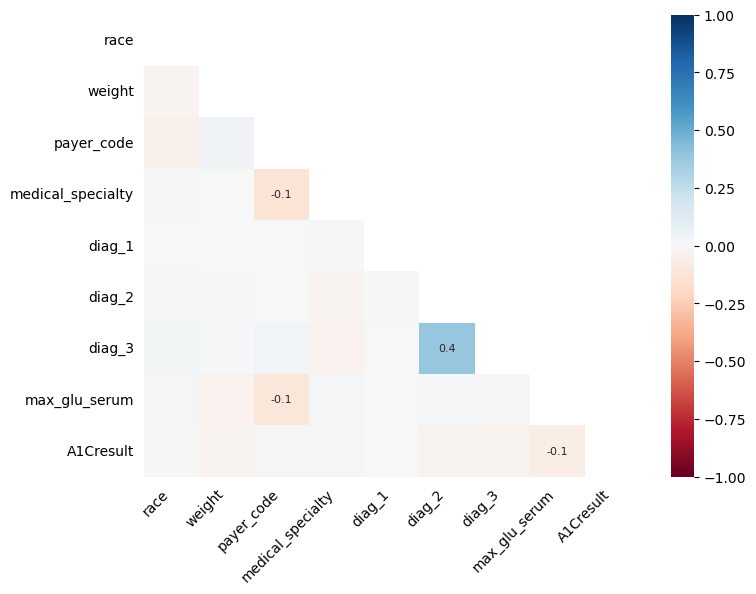

In [114]:
import missingno as msno

# Visualize missing data as a heatmap
msno.heatmap(df_clean, fontsize=10, figsize=(8, 6))
# plt.savefig(f'plots/missing_heatmap.png')
plt.show()

The heatmap displays correlations in the patterns of missingness between variables. A positive correlation of 0.4 between diag_2 and diag_3 indicates that if a record is missing a value for diag_2, there is an increased likelihood that it is also missing a value for diag_3. This relationship suggests that if diag_2 is missing, we may be able to use diag_3 (if available) to inform our imputation strategy.  
The lack of strong correlations between most other variables suggests their missingness is likely independent of one another. However, negative correlations (e.g., -0.1 between medical_specialty and max_glu_serum) indicate a weak inverse relationship, meaning that when one column has a missing value, the other is slightly less likely to be missing.

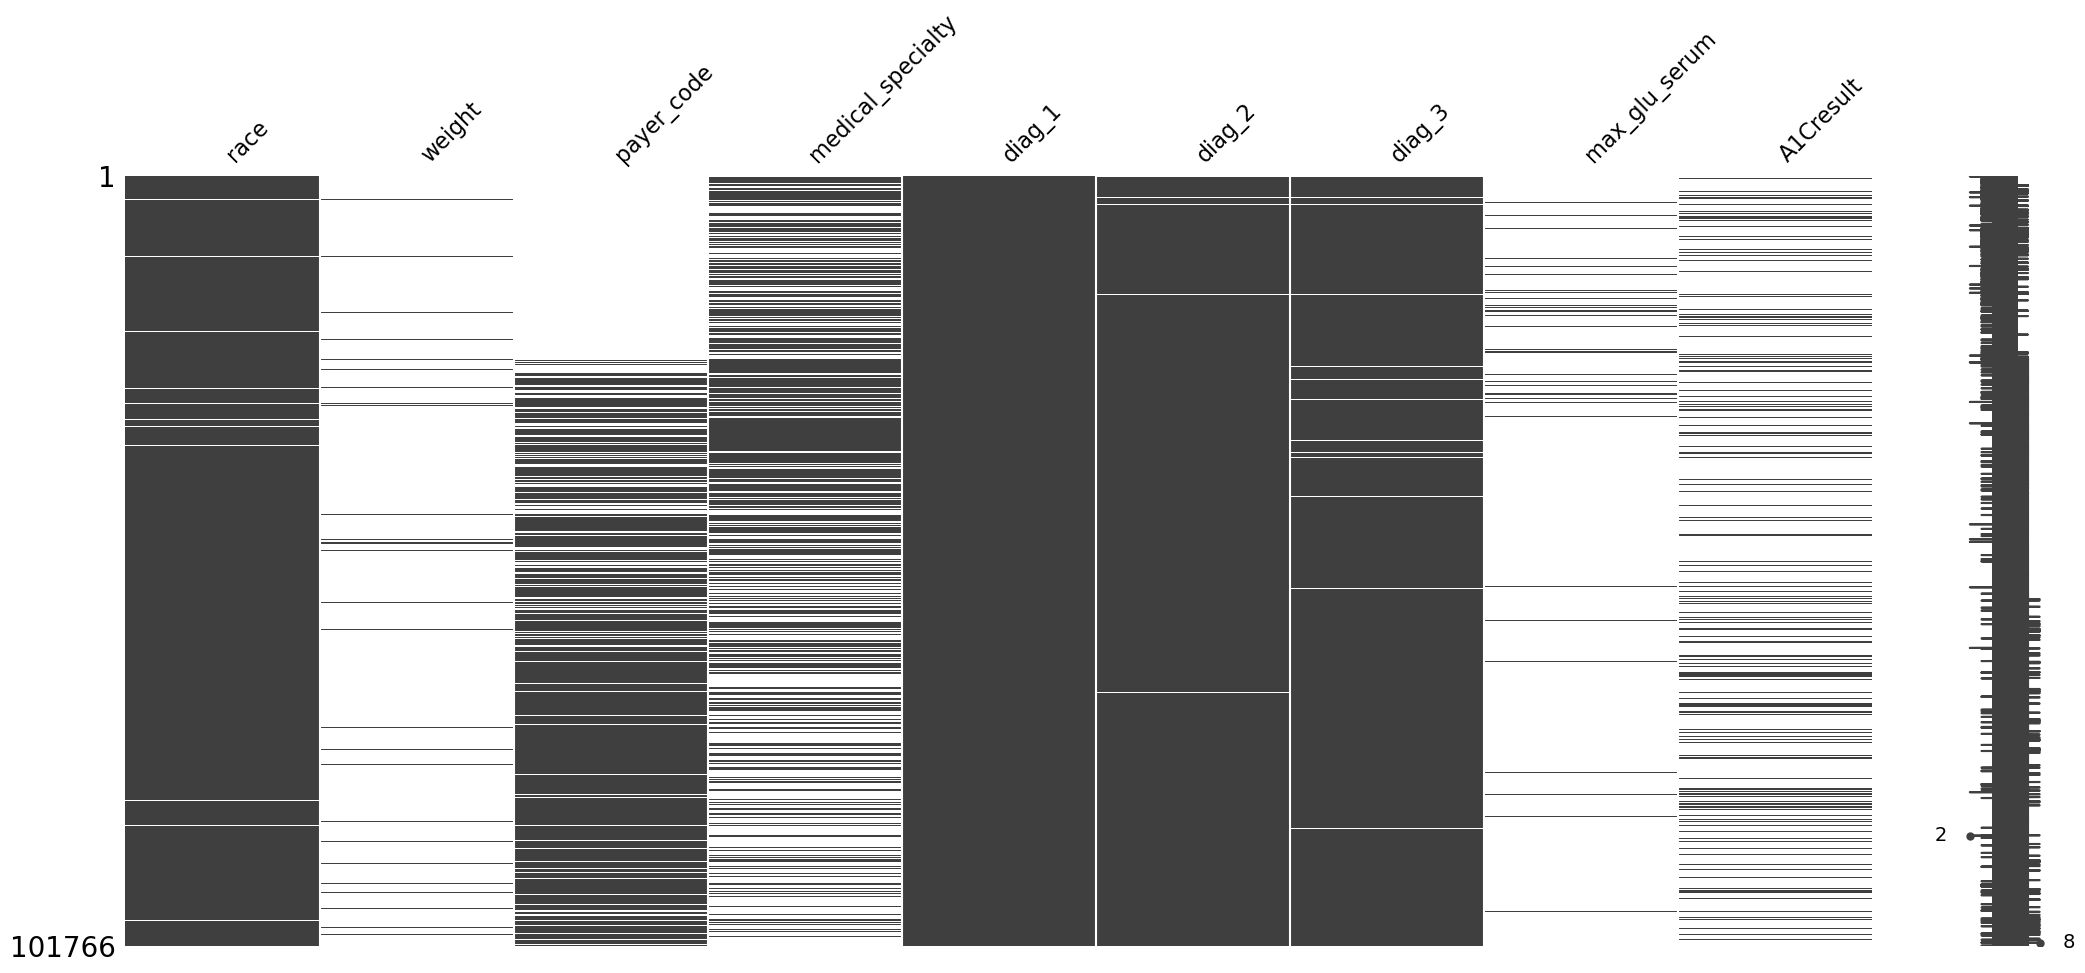

In [115]:
# Visualize missing data as a matrix
msno.matrix(df_clean.loc[:, df_clean.isnull().any()])
# plt.savefig(f'plots/missing_matrix.png')
plt.show()

This bar graph displays records across the full dataset, with missing values shown in white. There doesn’t appear to be a strong indication that specific rows are disproportionately affected by missingness. Patterns of missing values seem fairly distributed across rows without obvious clustering. This suggests that while variable-level missingness is significant, row-level missingness may not require targeted removal or specific handling.The dendrogram provides insights into relationships between variables based on their missingness patterns. Diagnosis codes (diag_1, diag_2, diag_3) cluster together, indicating shared trends in missing values, which may reflect relationships in the data collection process. Variables like max_glu_serum and weight also cluster, though this may be less meaningful due to the high proportion of missing data in these columns.

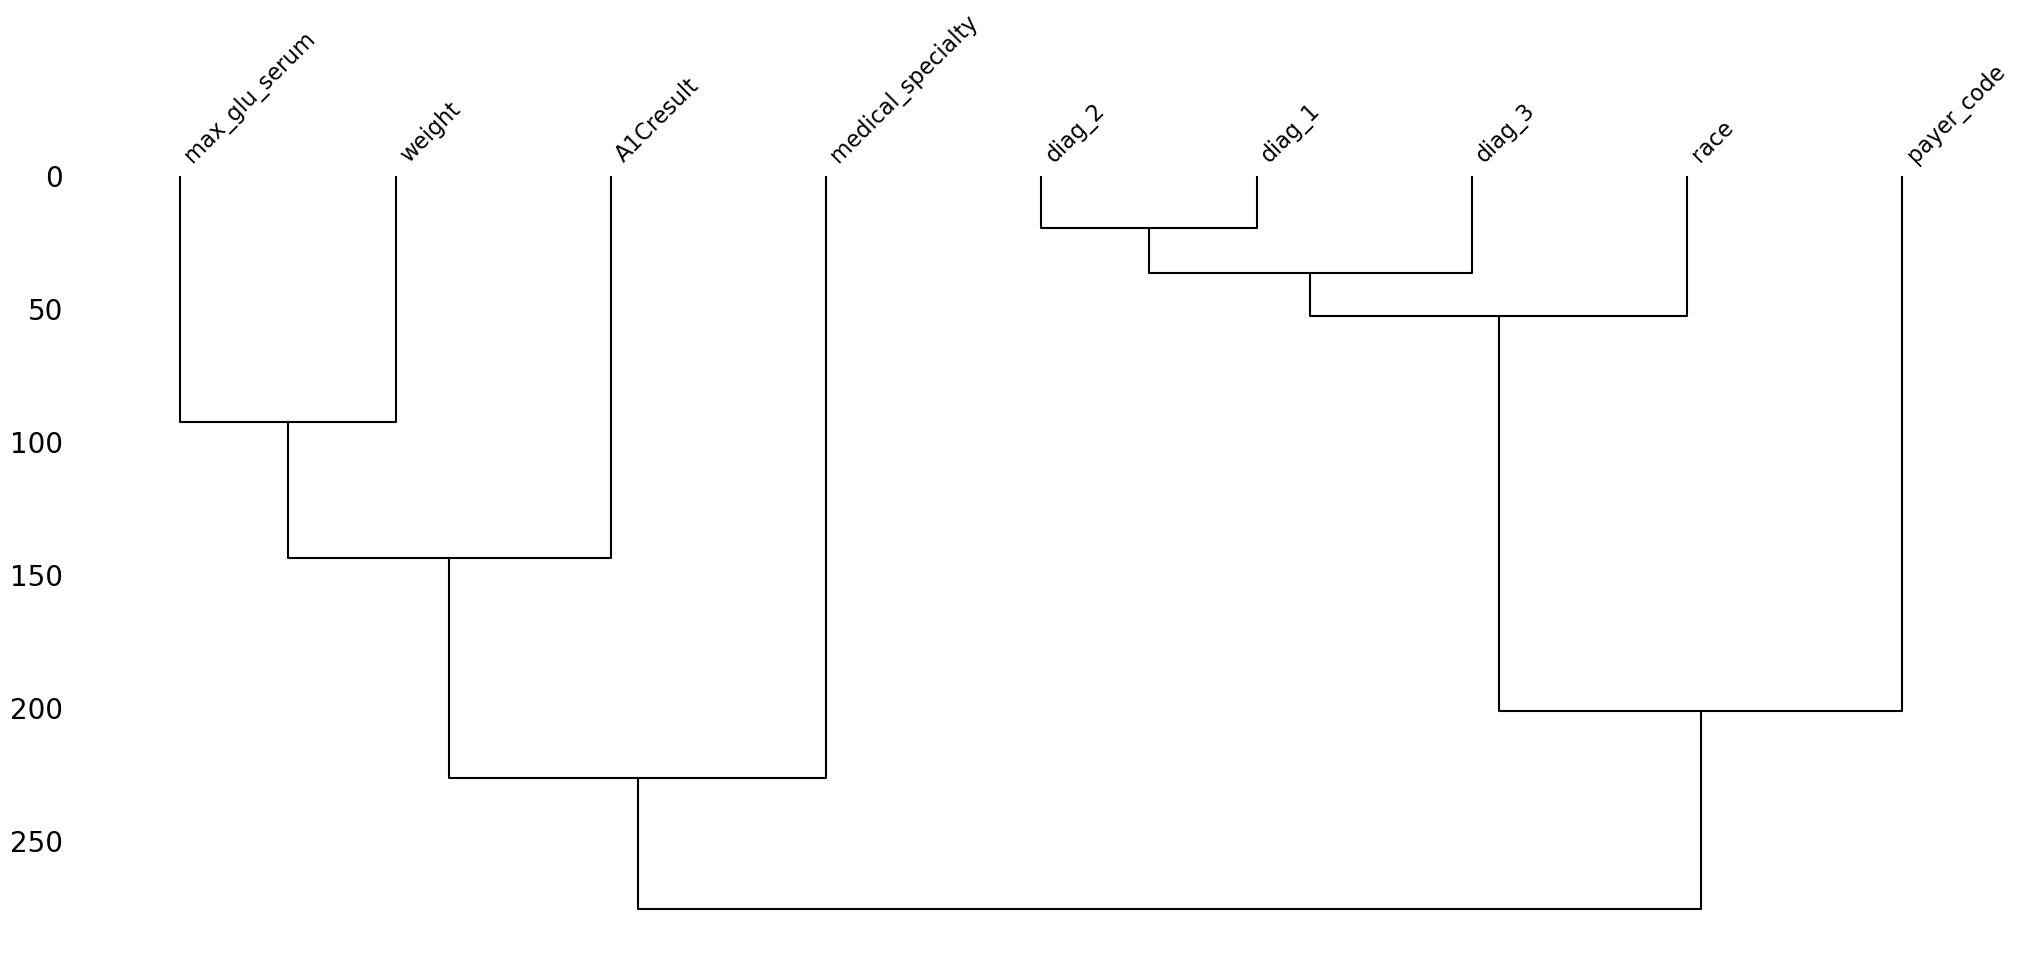

In [116]:
# Visualize dendrogram for missingness correlations
msno.dendrogram(df_clean.loc[:, df_clean.isnull().any()])
# plt.savefig(f'plots/missing_dendrogram.png')
plt.show()

The dendrogram provides insights into relationships between variables based on their missingness patterns. Diagnosis codes (diag_1, diag_2, diag_3) cluster together, indicating shared trends in missing values, which may reflect relationships in the data collection process. Variables like max_glu_serum and weight also cluster, though this may be less meaningful due to the high proportion of missing data in these columns.

#### Duplicates

In [117]:
duplicate_count = df_clean.duplicated().sum()
print(f'The dataset has {duplicate_count} duplicate records.')

The dataset has 0 duplicate records.


#### Remove ID variable: 'encounter_id'

In [118]:
# Verify that encounter_id is unique for each record.
df_clean['encounter_id'].nunique() == len(df_clean)

True

In [119]:
if 'encounter_id' in df_clean:
    del df_clean['encounter_id']

# if 'patient_nbr' in df_clean:
#     del df_clean['patient_nbr']

print( df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    3197 non-null    object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object
 10  medical_specialty         51817 non-null   object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [120]:
# Convert categorical variables `patient_nbr`, `admission_type_id`, `discharge_disposition_id`, `admission_source_id` from integer to object datatype
categoricalInt_cols = ['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df_clean[categoricalInt_cols] = df_clean[categoricalInt_cols].astype('category')
df_clean[['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']].dtypes

patient_nbr                 category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
dtype: object

### Statistical summaries of the features

##### *Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.*

In [121]:
# Summary statistics of the numerical features

# Calculate basic statistics
desc = df_clean.describe()  # Includes count, mean, std, 5-number summary
modes_num = df_clean.mode(numeric_only=True).iloc[0]  # Get the first mode for each column
variances = df_clean.var(numeric_only=True)
ranges = df_clean.max(numeric_only=True) - df_clean.min(numeric_only=True)

# Create a summary DataFrame
num_stats_df = pd.DataFrame({
    'Count': desc.loc['count'],
    'Mean': desc.loc['mean'],
    'Std': desc.loc['std'],
    'Min': desc.loc['min'],
    '25%': desc.loc['25%'],
    'Median': desc.loc['50%'],
    '75%': desc.loc['75%'],
    'Max': desc.loc['max'],
    'Range': ranges,
    'Variance': variances,
    'Mode': modes_num
})

# Rearrange and clean up for better presentation
num_stats_df = num_stats_df[['Count', 'Mean', 'Std', 'Variance', 'Min', '25%', 'Median', '75%', 'Max', 'Range', 'Mode']]
num_stats_df.reset_index(inplace=True)  # Optional: Keep variable names as a column
num_stats_df.rename(columns={'index': 'Variable'}, inplace=True)

# Display the final DataFrame
num_stats_df


Variable     Count       Mean        Std    Variance  Min   25%  \
0    time_in_hospital  101766.0   4.395987   2.985108    8.910868  1.0   2.0   
1  num_lab_procedures  101766.0  43.095641  19.674362  387.080530  1.0  31.0   
2      num_procedures  101766.0   1.339730   1.705807    2.909777  0.0   0.0   
3     num_medications  101766.0  16.021844   8.127566   66.057332  1.0  10.0   
4   number_outpatient  101766.0   0.369357   1.267265    1.605961  0.0   0.0   
5    number_emergency  101766.0   0.197836   0.930472    0.865779  0.0   0.0   
6    number_inpatient  101766.0   0.635566   1.262863    1.594824  0.0   0.0   
7    number_diagnoses  101766.0   7.422607   1.933600    3.738810  1.0   6.0   

   Median   75%    Max  Range  Mode  
0     4.0   6.0   14.0     13     3  
1    44.0  57.0  132.0    131     1  
2     1.0   2.0    6.0      6     0  
3    15.0  20.0   81.0     80    13  
4     0.0   0.0   42.0     42     0  
5     0.0   0.0   76.0     76     0  
6     0.0   1.0   21.0     21     0  
7     8.0   9.0   16.0     15     9

We computed the following summary statistics for the numerical variables: count, mean, standard deviation, variance, five-number summary (minimum and maximum, 25th and 75th percentile, and median), range, and mode. These tell us how many records there are and give us a sense of the distribution of the data. We have the measures of center (mean, median and mode), as well as measures of spread (standard deviation and variance). We also can see the full range of the data and and where the middle 50% of the data lie.  
For many of these features the mean and median (and also mostly the mode) are similar values. The distribution appear to be right skewed in many cases by high outliers. The exception to that seems to be number of lab procedures, which seems to be more normally distributed.  

In [122]:
# Summary statistics of the categorical features

# Calculate basic statistics
desc_cat = df_clean.describe(include=['object', 'category'])  # Includes count, unique, top, freq
top_percentage = (desc_cat.loc['freq'] / desc_cat.loc['count'] * 100).round(2)

# Create a summary DataFrame
cat_stats_df = pd.DataFrame({
    'Count': desc_cat.loc['count'],
    'Unique': desc_cat.loc['unique'],
    'Top': desc_cat.loc['top'],
    'Freq': desc_cat.loc['freq'],
    'Top %': top_percentage
})

# Rearrange and clean up for better presentation
cat_stats_df.reset_index(inplace=True)  # Optional: Keep variable names as a column
cat_stats_df.rename(columns={'index': 'Variable'}, inplace=True)

# Display the final DataFrame
cat_stats_df

Variable   Count Unique               Top    Freq  \
0                patient_nbr  101766  71518          88785891      40   
1                       race   99493      5         Caucasian   76099   
2                     gender  101766      3            Female   54708   
3                        age  101766     10           [70-80)   26068   
4                     weight    3197      9          [75-100)    1336   
5          admission_type_id  101766      8                 1   53990   
6   discharge_disposition_id  101766     26                 1   60234   
7        admission_source_id  101766     17                 7   57494   
8                 payer_code   61510     17                MC   32439   
9          medical_specialty   51817     72  InternalMedicine   14635   
10                    diag_1  101745    716               428    6862   
11                    diag_2  101408    748               276    6752   
12                    diag_3  100343    789               250   11555   
13             max_glu_serum    5346      3              Norm    2597   
14                 A1Cresult   17018      3                >8    8216   
15                 metformin  101766      4                No   81778   
16               repaglinide  101766      4                No  100227   
17               nateglinide  101766      4                No  101063   
18            chlorpropamide  101766      4                No  101680   
19               glimepiride  101766      4                No   96575   
20             acetohexamide  101766      2                No  101765   
21                 glipizide  101766      4                No   89080   
22                 glyburide  101766      4                No   91116   
23               tolbutamide  101766      2                No  101743   
24              pioglitazone  101766      4                No   94438   
25             rosiglitazone  101766      4                No   95401   
26                  acarbose  101766      4                No  101458   
27                  miglitol  101766      4                No  101728   
28              troglitazone  101766      2                No  101763   
29                tolazamide  101766      3                No  101727   
30                   examide  101766      1                No  101766   
31               citoglipton  101766      1                No  101766   
32                   insulin  101766      4                No   47383   
33       glyburide-metformin  101766      4                No  101060   
34       glipizide-metformin  101766      2                No  101753   
35  glimepiride-pioglitazone  101766      2                No  101765   
36   metformin-rosiglitazone  101766      2                No  101764   
37    metformin-pioglitazone  101766      2                No  101765   
38                    change  101766      2                No   54755   
39               diabetesMed  101766      2               Yes   78363   
40                readmitted  101766      3                NO   54864   

        Top %  
0    0.039306  
1   76.486788  
2   53.758623  
3   25.615628  
4   41.789177  
5   53.053083  
6   59.188727  
7   56.496276  
8   52.737766  
9   28.243627  
10   6.744312  
11   6.658252  
12  11.515502  
13  48.578376  
14  48.278294  
15  80.358862  
16  98.487707  
17    99.3092  
18  99.915492  
19  94.899082  
20  99.999017  
21  87.534147  
22  89.534815  
23  99.977399  
24  92.799167  
25  93.745455  
26  99.697345  
27  99.962659  
28  99.997052  
29  99.961677  
30      100.0  
31      100.0  
32  46.560737  
33  99.306252  
34  99.987226  
35  99.999017  
36  99.998035  
37  99.999017  
38  53.804807  
39  77.003125  
40  53.911916

For the categorical variables (including the target), we computed the following summary statistics: count, number of unique values (levels), `Top` - the level that occurs most frequently, `Freq` - the number of occurences of the top level, and the percentage of the values within that level.  
This indicates that for many features, nearly all of the values fall within one category (e.g. over 99% of patients do not take 15 out of the 23 drugs in the dataset). We also can see that there are repeated patients in the dataset.  

In [123]:
# Find the proportion of each response class.
print(df_clean['readmitted'].value_counts()/df_clean['readmitted'].count())

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: count, dtype: float64


The response class is unbalanced with 54% patient records not being readmitted, 35% being readmitted in greater than 30 days, and 11% being readmitted in less than 30 days.

In [124]:
# Find how many patients are have more than one encounter.

patient_counts = df_clean['patient_nbr'].value_counts(dropna=False)
repeated_patients = patient_counts[patient_counts > 1]
num_repeated_patients = len(repeated_patients)
print(f"Number of patients with more than one record: {num_repeated_patients}")

repeated_patients.min(), repeated_patients.max()

Number of patients with more than one record: 16773


(2, 40)

patient_nbr is not unique for each record in the dataset indicating that there are repeated measures. 16,773 patients have between 2 and 40 encounters.

In [125]:
# Verify that values in 'examide' and 'citoglipton' are 100% 'No' across the full dataset
print(df_clean['examide'].value_counts())
print(df_clean['citoglipton'].value_counts())

examide
No    101766
Name: count, dtype: int64
citoglipton
No    101766
Name: count, dtype: int64


We should be able to eliminate these variables, since they aren't offering any insight.

In [126]:
# Remove examide and citoglipton from the dataset.
if 'examide' in df_clean:
    del df_clean['examide']

if 'citoglipton' in df_clean:
    del df_clean['citoglipton']

print( df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   patient_nbr               101766 non-null  category
 1   race                      99493 non-null   object  
 2   gender                    101766 non-null  object  
 3   age                       101766 non-null  object  
 4   weight                    3197 non-null    object  
 5   admission_type_id         101766 non-null  category
 6   discharge_disposition_id  101766 non-null  category
 7   admission_source_id       101766 non-null  category
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                61510 non-null   object  
 10  medical_specialty         51817 non-null   object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

#### Outliers

In [127]:
# Calculate IQR and outlier bounds
num_stats_df['IQR'] = num_stats_df['75%'] - num_stats_df['25%']  # Interquartile Range
num_stats_df['Lower_IQR_Bound'] = num_stats_df['25%'] - 1.5 * num_stats_df['IQR']
num_stats_df['Upper_IQR_Bound'] = num_stats_df['75%'] + 1.5 * num_stats_df['IQR']

outliers = {} # Empty dictionary to store outliers for each variable
total_rows = len(df_clean)

for var in df_clean.select_dtypes(include='number').columns:
    # Get lower and upper bounds for the variable
    lower_bound = num_stats_df.loc[num_stats_df['Variable'] == var, 'Lower_IQR_Bound'].values[0]
    upper_bound = num_stats_df.loc[num_stats_df['Variable'] == var, 'Upper_IQR_Bound'].values[0]
    
    # Find outliers
    outliers[var] = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)][var]

# Summarize outliers
outlier_counts = {var: len(outlier_values) for var, outlier_values in outliers.items()}
outlier_proportions = {var: round((count / total_rows) * 100, 2) for var, count in outlier_counts.items()}  # Convert to percentage and round

# Create a summary DataFrame
outliers_summary_df = pd.DataFrame({
    'Variable': outlier_counts.keys(),
    'Outlier Count': outlier_counts.values(),
    'Outlier Proportion (%)': outlier_proportions.values()  # Updated to percentage
})

outliers_summary_df

Variable  Outlier Count  Outlier Proportion (%)
0    time_in_hospital           2252                    2.21
1  num_lab_procedures            143                    0.14
2      num_procedures           4954                    4.87
3     num_medications           2557                    2.51
4   number_outpatient          16739                   16.45
5    number_emergency          11383                   11.19
6    number_inpatient           7049                    6.93
7    number_diagnoses            281                    0.28

Suspected outliers were identified using the interquartile range (IQR) method: values below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR were classified as outliers. Variables related to hospital visits (e.g. number_outpatient, number_emergency, number_inpatient) exhibited a higher proportion of outliers, with more than 5% of observations flagged. These variables had low mean, median, and mode values, but a small subset of patients had disproportionately high numbers of visits.  
Other numeric variables had fewer than 5% of observations defined as outliers. It may be worth examining potential correlations among the hospital visit variables, as certain patients could be more prone to frequent hospital visits and associated interventions.

### Visualization of the attributes

This plots the distribution of the target variable, readmitted.

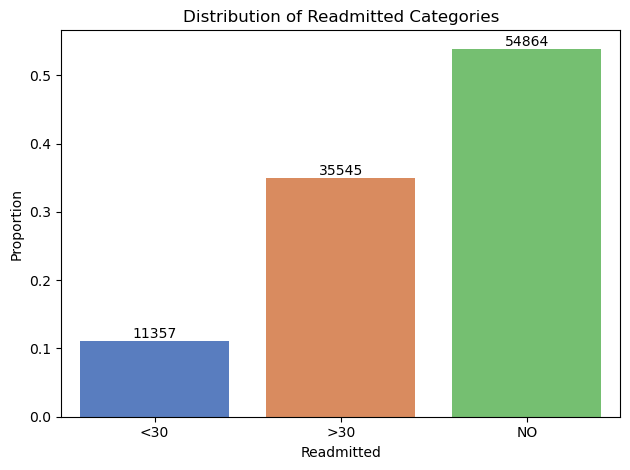

In [128]:
# Define the response categories in order
readmit_order = ['<30', '>30', 'NO']
df_clean['readmitted'] = pd.Categorical(df_clean['readmitted'], categories=readmit_order, ordered=True)

# Set the color palette
palette = sns.color_palette("muted", n_colors=len(readmit_order))

# Calculate counts and proportions of each category
readmit_counts = df_clean['readmitted'].value_counts(sort=False)  # Counts
readmit_proportions = readmit_counts / readmit_counts.sum()  # Proportions

# Plot the distribution
fig, ax = plt.subplots()
sns.barplot(
    x=readmit_proportions.index, 
    y=readmit_proportions.values, 
    hue=readmit_proportions.index,
    palette=palette, 
    ax=ax
)

# Add titles and labels
ax.set_title('Distribution of Readmitted Categories')
ax.set_xlabel('Readmitted')
ax.set_ylabel('Proportion')

# Add counts as labels on top of each bar
for bar, count in zip(ax.patches, readmit_counts.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height(),                  # y-coordinate (bar height)
        f'{count}',                        # Text label
        ha='center', va='bottom',         # Center alignment
        fontsize=10
    )

plt.tight_layout()
# plt.savefig(f'plots/barplot_readmitted.png', bbox_inches="tight") 
plt.show()

This plots the distribution of each numerical variable with histograms and boxplots to get a visual sense of each variable. It has been commented out because it would be more infomative to compare the distributions of each response class.

In [129]:
# numeric_cols = df_clean.select_dtypes(include=['int64']).columns

# for col in numeric_cols:
#     fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
#     ax1.hist(df_clean[col], color='skyblue', edgecolor='black')
#     ax1.set_title(f"Histogram of {col}")
#     ax2.boxplot(df_clean[col], vert=False)
#     ax2.set_title(f"Boxplot of {col}")
#     plt.tight_layout()
#     # plt.savefig(f'plots/plot_{col}.png', bbox_inches="tight")  # Save or display tightly
#     plt.show()

This plots the distribution of each numerical variable split by response class. A histogram (or kernel density plot) and boxplots are plotted to get a visual sense of each variable.

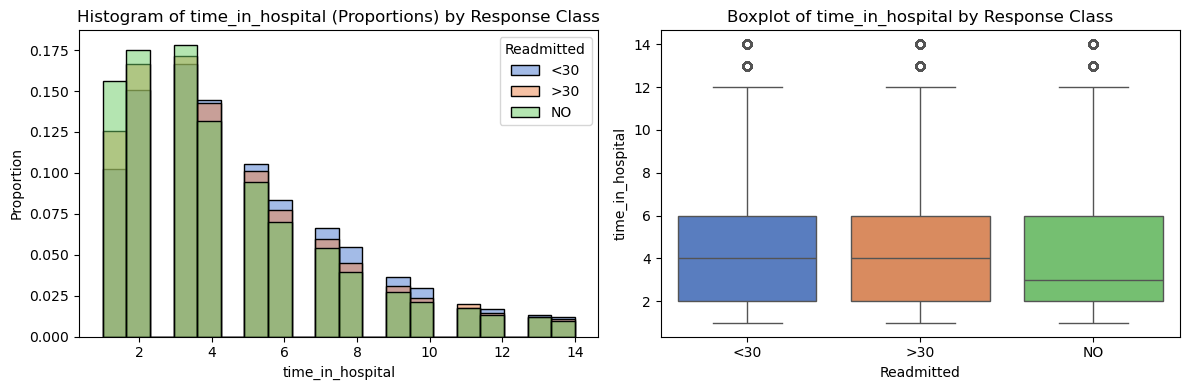

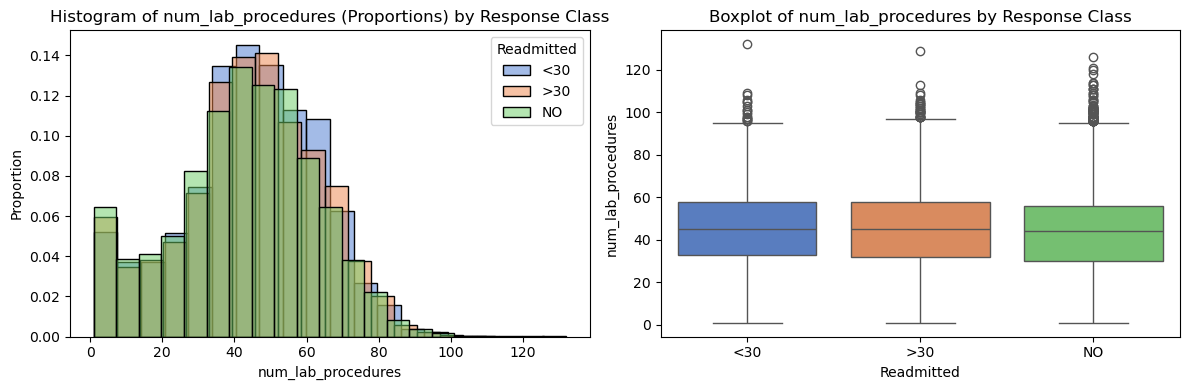

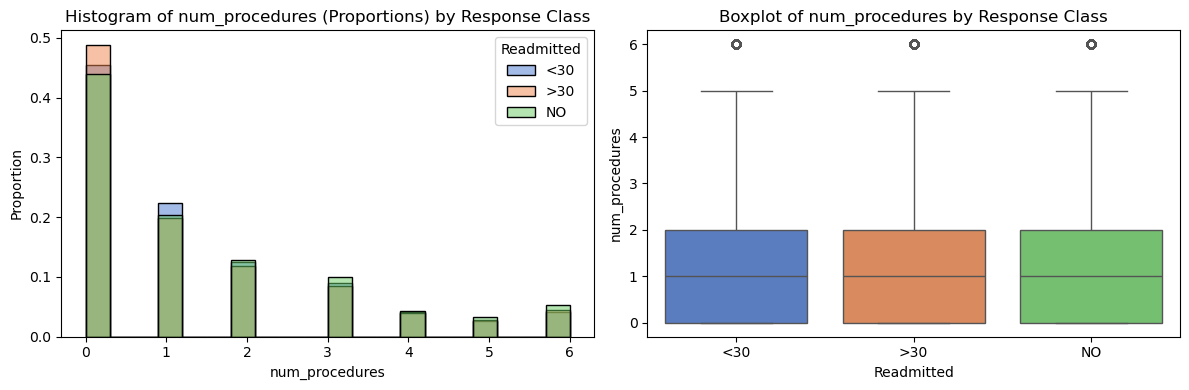

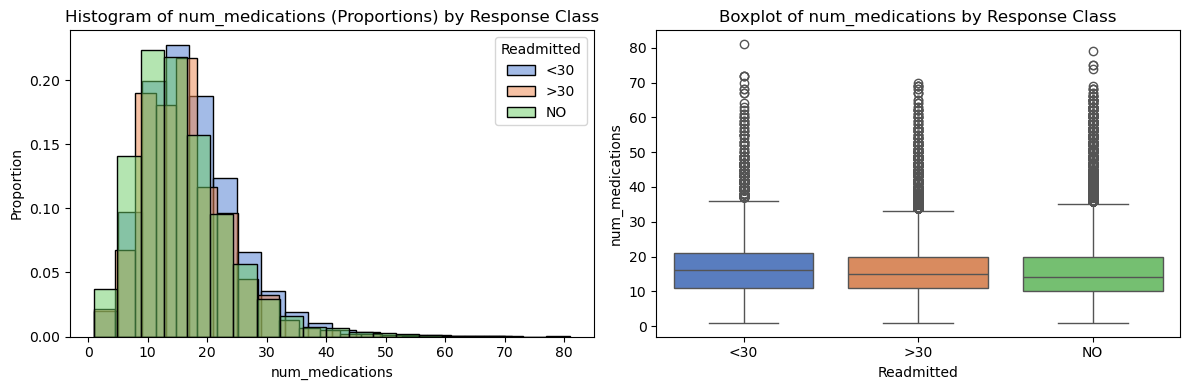

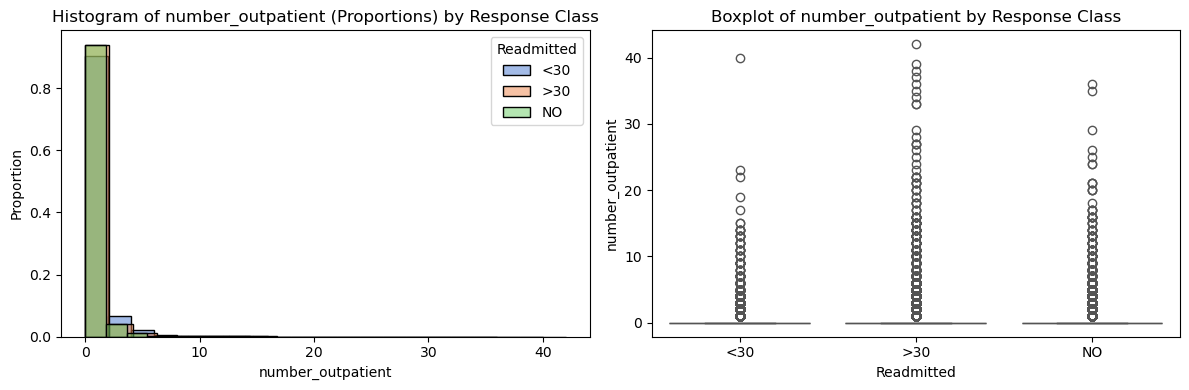

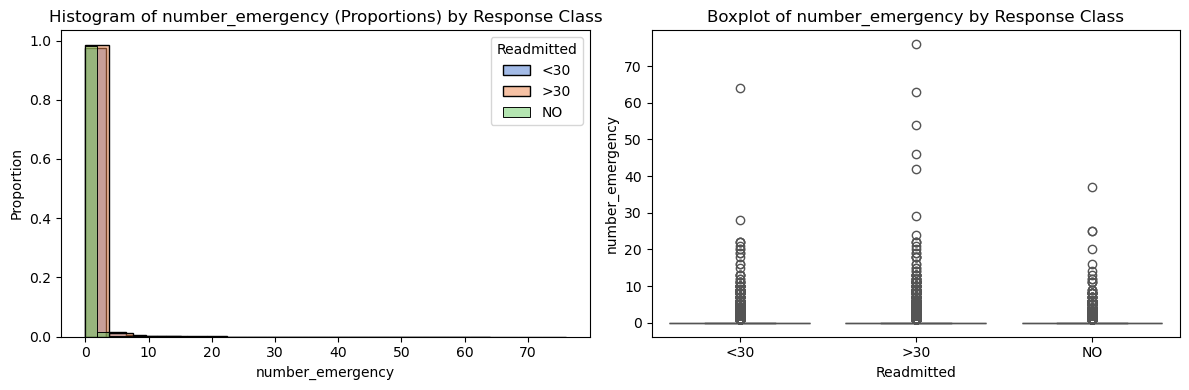

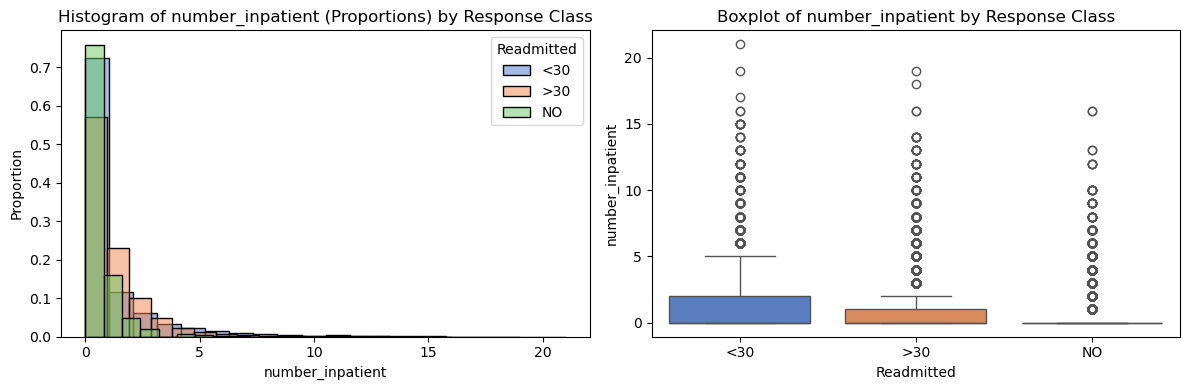

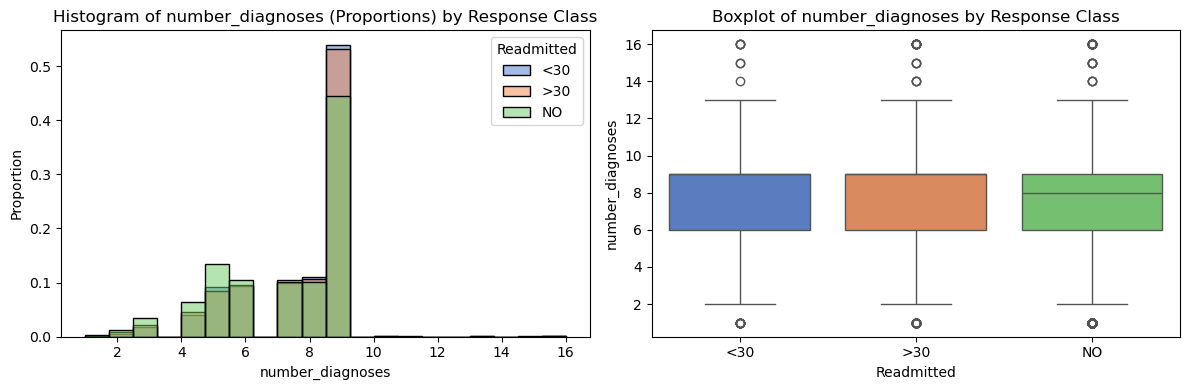

In [130]:
# Define the response categories in order
readmit_order = ['<30', '>30', 'NO']
df_clean['readmitted'] = pd.Categorical(df_clean['readmitted'], categories=readmit_order, ordered=True)

# List of numeric columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Set the color palette
palette = sns.color_palette("muted", n_colors=len(readmit_order))

# Generate plots for each numeric column
for col in numeric_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histogram with proportions
    for idx, category in enumerate(readmit_order):
        subset = df_clean[df_clean['readmitted'] == category]
        sns.histplot(subset[col], bins=20, color=palette[idx], label=category, alpha=0.5, stat="probability", ax=axes[0])

    axes[0].set_title(f"Histogram of {col} (Proportions) by Response Class")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Proportion')
    axes[0].legend(title='Readmitted')

    # OR Kernel Density Plot
    # for idx, category in enumerate(readmit_order):
    #     subset = df_clean[df_clean['readmitted'] == category]
    #     sns.kdeplot(subset[col], fill=True, color=palette[idx], label=category, alpha=0.5, ax=axes[0])

    # axes[0].set_title(f"Kernel Density Plot of {col} by Response Class")
    # axes[0].set_xlabel(col)
    # axes[0].set_ylabel('Density')
    # axes[0].legend(title='Readmitted')

    # Boxplot
    sns.boxplot(data=df_clean, x='readmitted', y=col, hue='readmitted', palette=palette[:len(readmit_order)], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col} by Response Class")
    axes[1].set_xlabel('Readmitted')
    axes[1].set_ylabel(col)
    
    plt.tight_layout()
    # plt.savefig(f'plots/plot_{col}_by_readmitted.png', bbox_inches="tight") 
    plt.show()


In [131]:
# This is to get a sense of the importance of a variable in target class separation.

# Group numerical variables by `readmitted` and view some summary stats

# Split the numerical columns into two groups
split_point = len(numeric_cols) // 2
numeric_cols_part1 = numeric_cols[:split_point]
numeric_cols_part2 = numeric_cols[split_point:]

# Group numerical variables (first half) by `readmitted` and calculate summary stats
aggregated_numstats1 = (
    df_clean.groupby('readmitted', observed=False)[numeric_cols_part1]
    .agg(['mean', 'std', 'median'])
    .loc[['<30', '>30', 'NO']]  # Reorder rows for readability
)

# Group numerical variables (second half) by `readmitted` and calculate summary stats
aggregated_numstats2 = (
    df_clean.groupby('readmitted', observed=False)[numeric_cols_part2]
    .agg(['mean', 'std', 'median'])
    .loc[['<30', '>30', 'NO']]
)

print("Part 1: Summary statistics for the first group of numerical variables")
aggregated_numstats1

Part 1: Summary statistics for the first group of numerical variables


time_in_hospital                  num_lab_procedures             \
                       mean       std median               mean        std   
readmitted                                                                   
<30                4.768249  3.028165    4.0          44.226028  19.276087   
>30                4.495541  2.988064    4.0          43.836601  19.567515   
NO                 4.254429  2.964964    3.0          42.381598  19.796262   

                  num_procedures                  num_medications            \
           median           mean       std median            mean       std   
readmitted                                                                    
<30          45.0       1.280884  1.635992    1.0       16.903143  8.096696   
>30          45.0       1.249599  1.669536    1.0       16.282768  7.618829   
NO           44.0       1.410305  1.739693    1.0       15.670367  8.427628   

                   
           median  
readmitted         
<30          16.0  
>30          15.0  
NO           14.0

In [132]:
print("\nPart 2: Summary statistics for the second group of numerical variables")
aggregated_numstats2


Part 2: Summary statistics for the second group of numerical variables


number_outpatient                  number_emergency            \
                        mean       std median             mean       std   
readmitted                                                                 
<30                 0.436911  1.302788    0.0         0.357313  1.370384   
>30                 0.496329  1.544047    0.0         0.283669  1.194989   
NO                  0.273112  1.030704    0.0         0.109216  0.523609   

                  number_inpatient                  number_diagnoses  \
           median             mean       std median             mean   
readmitted                                                             
<30           0.0         1.224003  1.954577    0.0         7.692789   
>30           0.0         0.838993  1.393265    0.0         7.646898   
NO            0.0         0.381963  0.864301    0.0         7.221366   

                             
                 std median  
readmitted                   
<30         1.773477    9.0  
>30         1.812078    9.0  
NO          2.017054    8.0

- There isn't obvious class separation in the numerical variables. However, looking at the graphs and summary statistics, there does appear to be some difference in the following features.  
  - time_in_hospital
  - num_lab_procedures
  - num_medications
  - number_emergency
  - number_inpatient
  - number_diagnoses

This plots the percentages of levels in each grouping of categorical variables, displaying the most frequent categories (up to 24) to get a visual sense of each variable. It has been commented out because it would be more infomative to compare the distributions of each response class.

In [133]:
# def plot_categorical_groups(df, groups, ncols=2, top_n=12):
#     """
#     Creates bar charts of percentages for categorical variables in the specified groups.
    
#     Parameters:
#         df (DataFrame): The data frame containing the variables.
#         groups (dict): A dictionary with group names as keys and lists of variables as values.
#         ncols (int): Number of columns for the subplot grid (default is 2).
#         top_n (int): Maximum number of categories to display in the bar chart (default is 12).
#     """
#     for group_name, variables in groups.items():
#         # Number of rows needed
#         nrows = -(-len(variables) // ncols)  # Ceiling division
        
#         # Create subplots
#         fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
#         axes = axes.flatten()  # Flatten axes for easy iteration
        
#         # Plot each variable in the group
#         for i, var in enumerate(variables):
#             if var in df.columns:  # Check if variable exists in DataFrame
#                 # Calculate percentages
#                 percentages = df[var].value_counts(normalize=True) * 100
#                 percentages.sort_values(ascending=False, inplace=True)
                
#                 # Limit to top_n categories
#                 percentages = percentages.iloc[:top_n]
                
#                 # Bar plot
#                 axes[i].bar(percentages.index.astype(str), percentages.values, color='skyblue', edgecolor='black')
#                 axes[i].set_title(f'{group_name}: {var}', fontsize=12)
#                 axes[i].set_ylabel('Percentage (%)')
                
#                 # Set ticks and tick labels
#                 axes[i].set_xticks(range(len(percentages.index)))  # Set tick positions
#                 axes[i].set_xticklabels(percentages.index.astype(str), rotation=45, ha='right')  # Set tick labels
#             else:
#                 axes[i].set_visible(False)  # Hide empty plots
        
#         # Hide unused axes
#         for j in range(len(variables), len(axes)):
#             axes[j].set_visible(False)
        
#         # Adjust layout
#         plt.tight_layout()
#         plt.suptitle(f'Group: {group_name}', fontsize=16, y=1.02)  # Add a super title
#         # plt.savefig(f'plots/plot_{group_name}.png')
#         plt.show()

# # Grouping categorical variables for plotting
# groups = {
#     "Demographics": ['patient_nbr', 'race', 'gender', 'age', 'weight'],
#     "Administrative": ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty'],
#     "Diagnoses": ['diag_1', 'diag_2', 'diag_3'],
#     "Tests": ['max_glu_serum', 'A1Cresult'],
#     "FirstLineDrugs": ['insulin', 'metformin'],
#     "Meglitinides": ['repaglinide', 'nateglinide'],
#     "Sulfonylureas": ['chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide'],
#     "TZDs": ['pioglitazone', 'rosiglitazone', 'troglitazone'],
#     "AGIs": ['acarbose', 'miglitol'],
#     "Combos": ['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'],
#     "Treatment": ['change', 'diabetesMed'],
#     "Target": ['readmitted']
# }

# # Call the function, limiting to the top 24 categories
# plot_categorical_groups(df_clean, groups, ncols=2, top_n=24)


This plots the percentages of each readmitted class within the levels of each categorical variables in bar plots. Only the 12 most frequency categorical levels are displayed. It helps us get a sense of if and how the distribution of each response class changes between categorical levels.

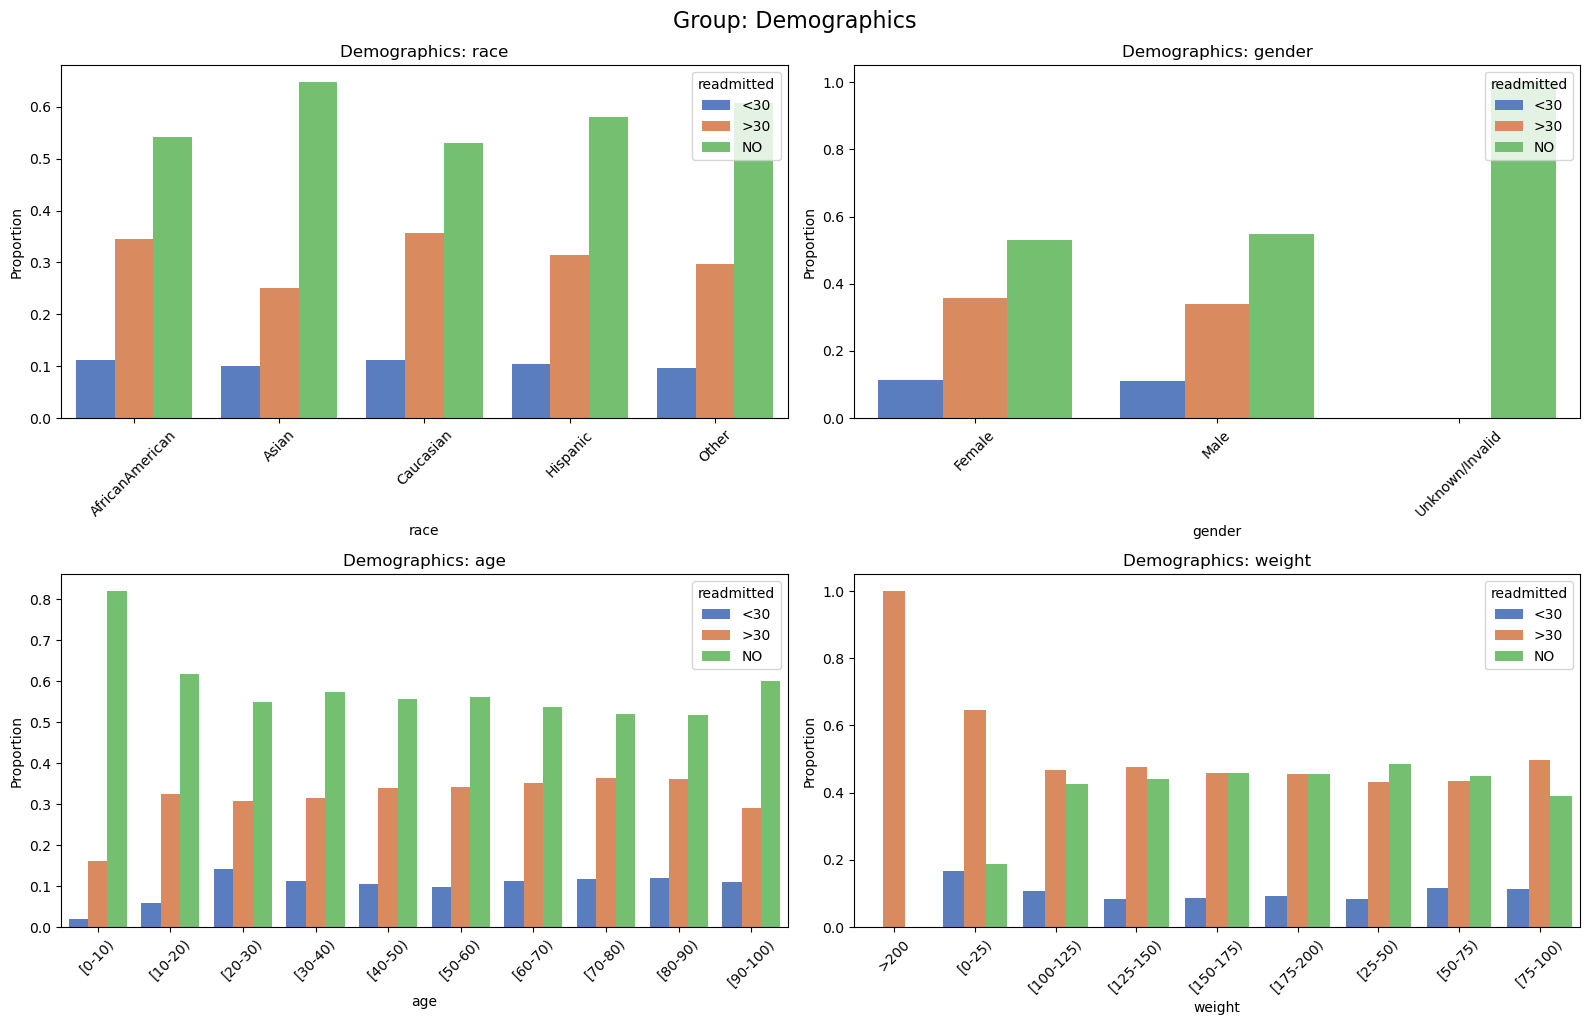

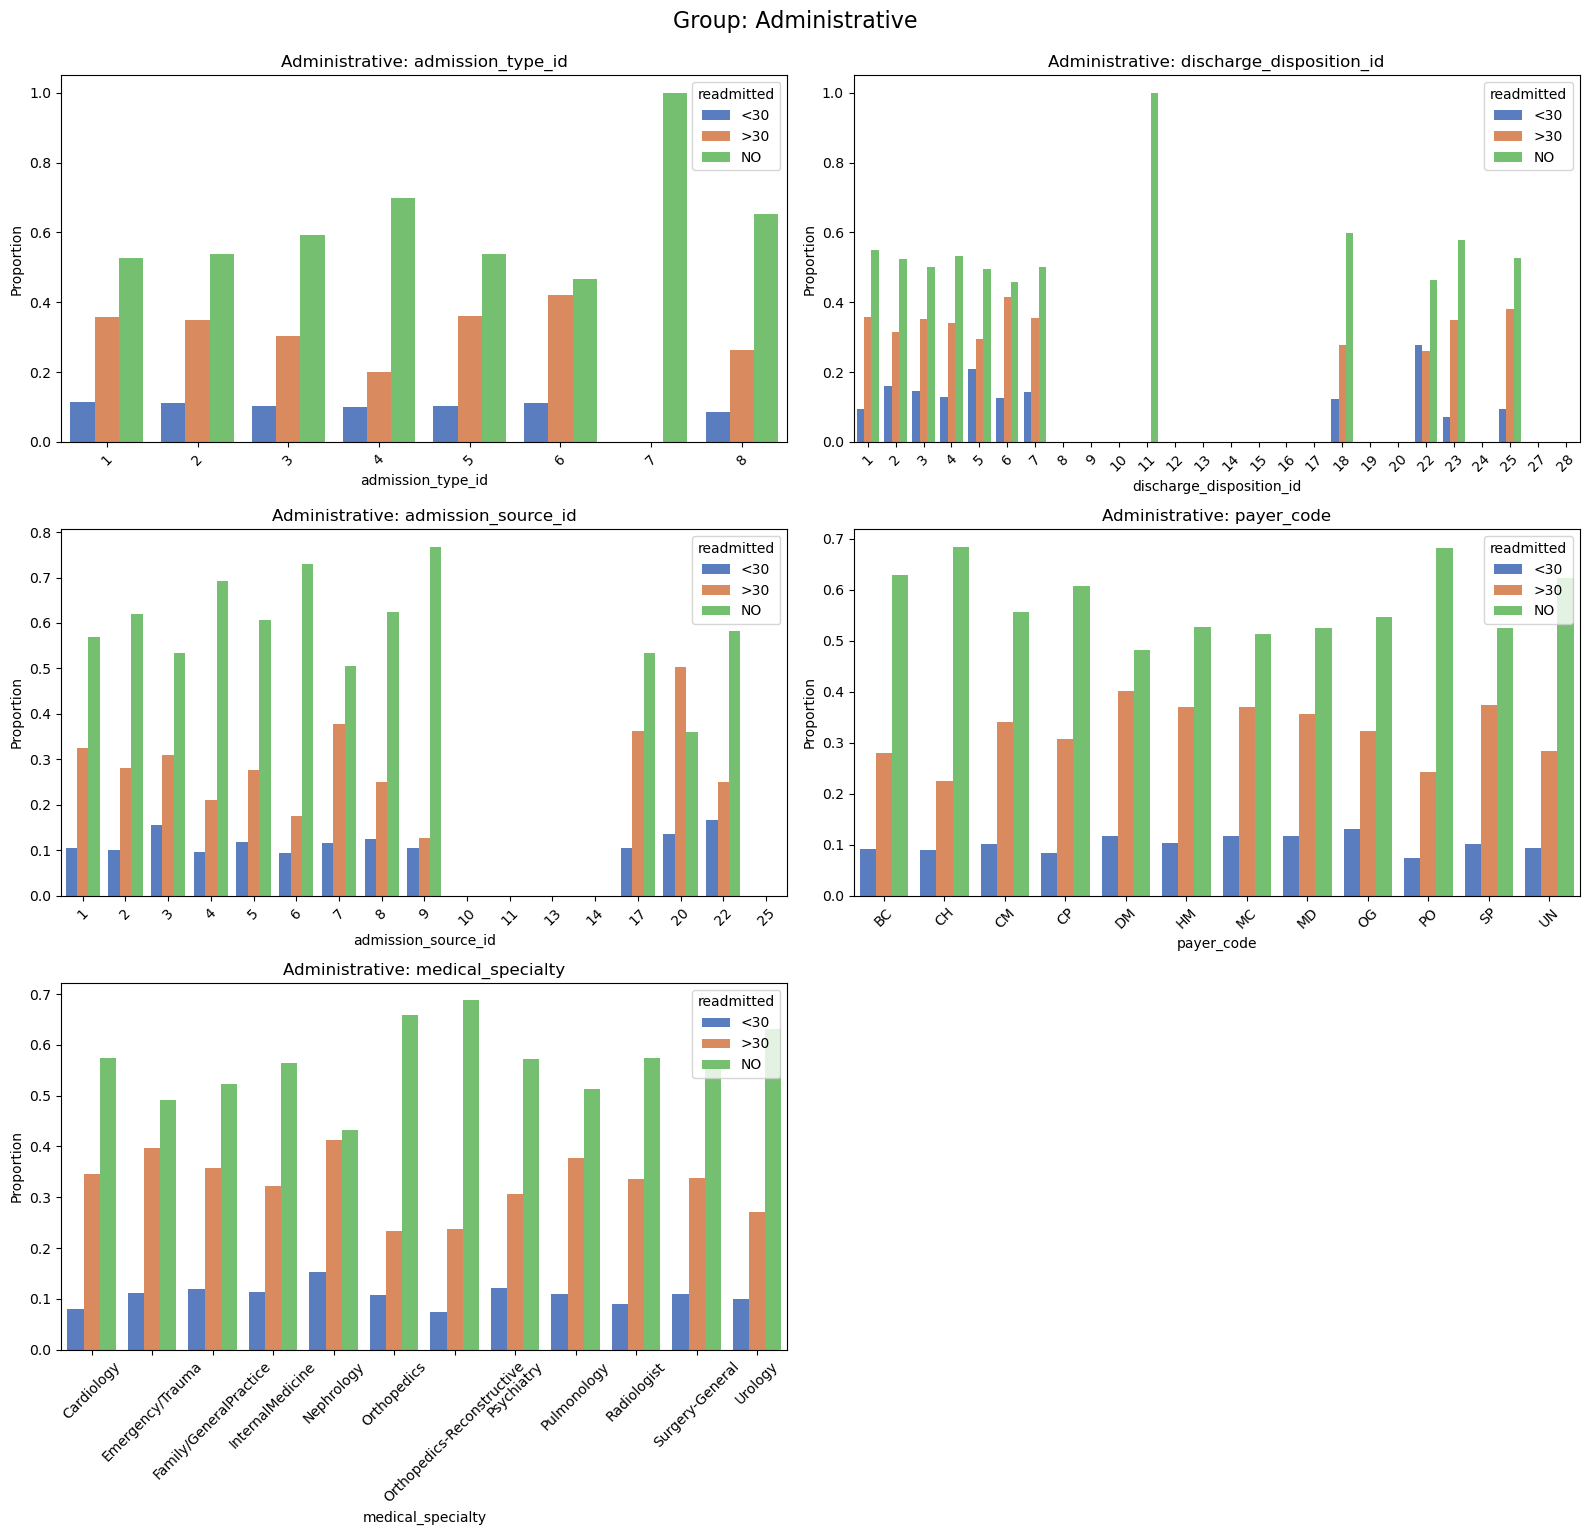

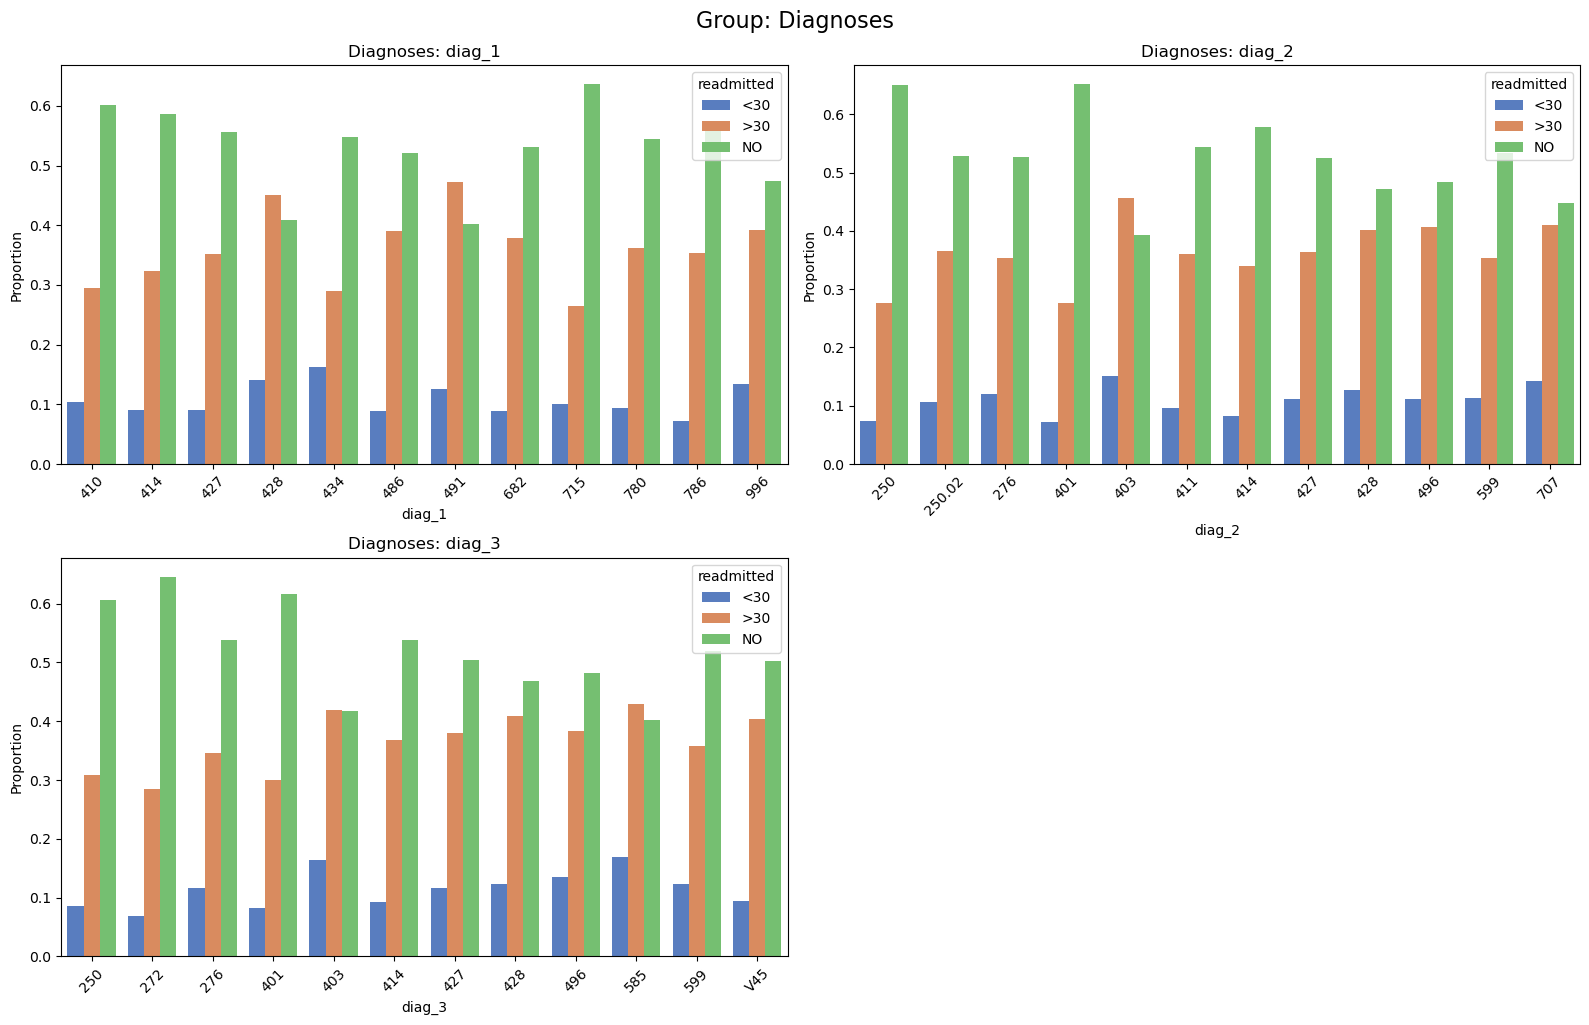

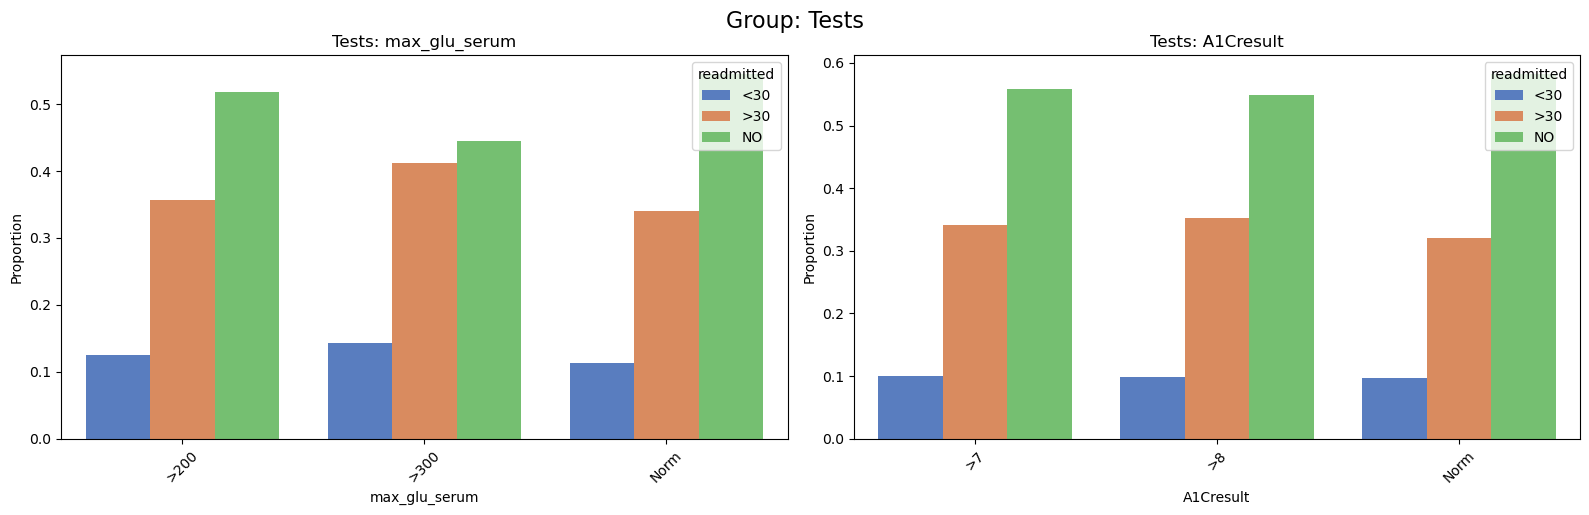

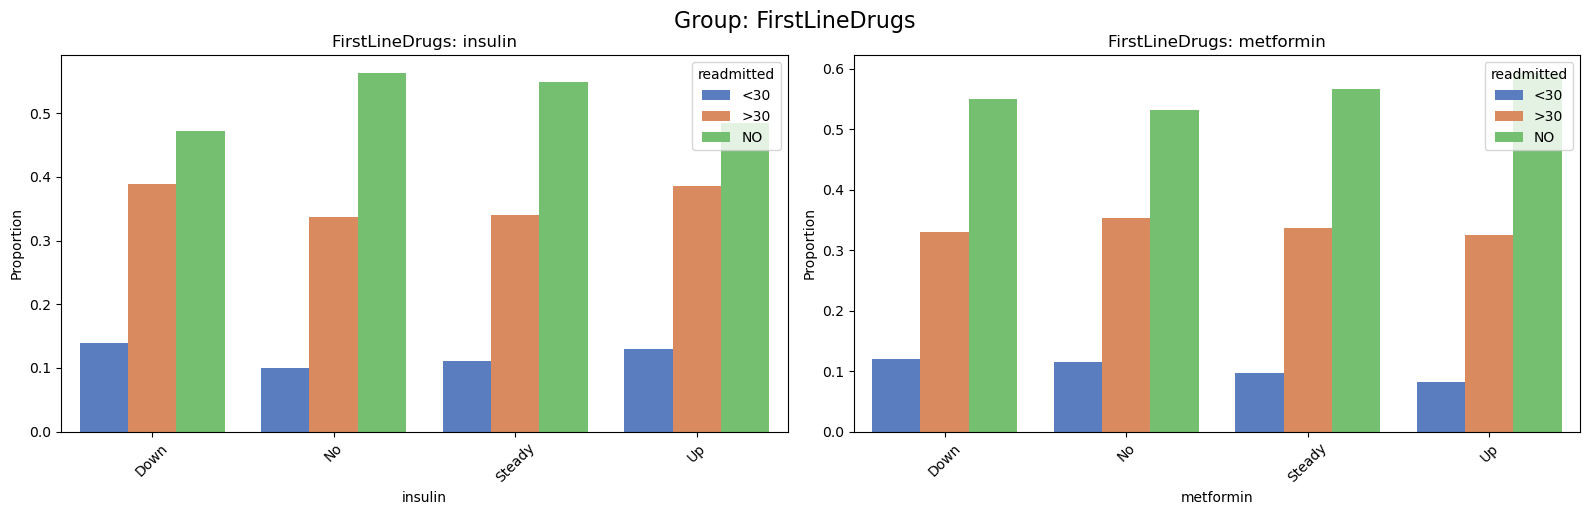

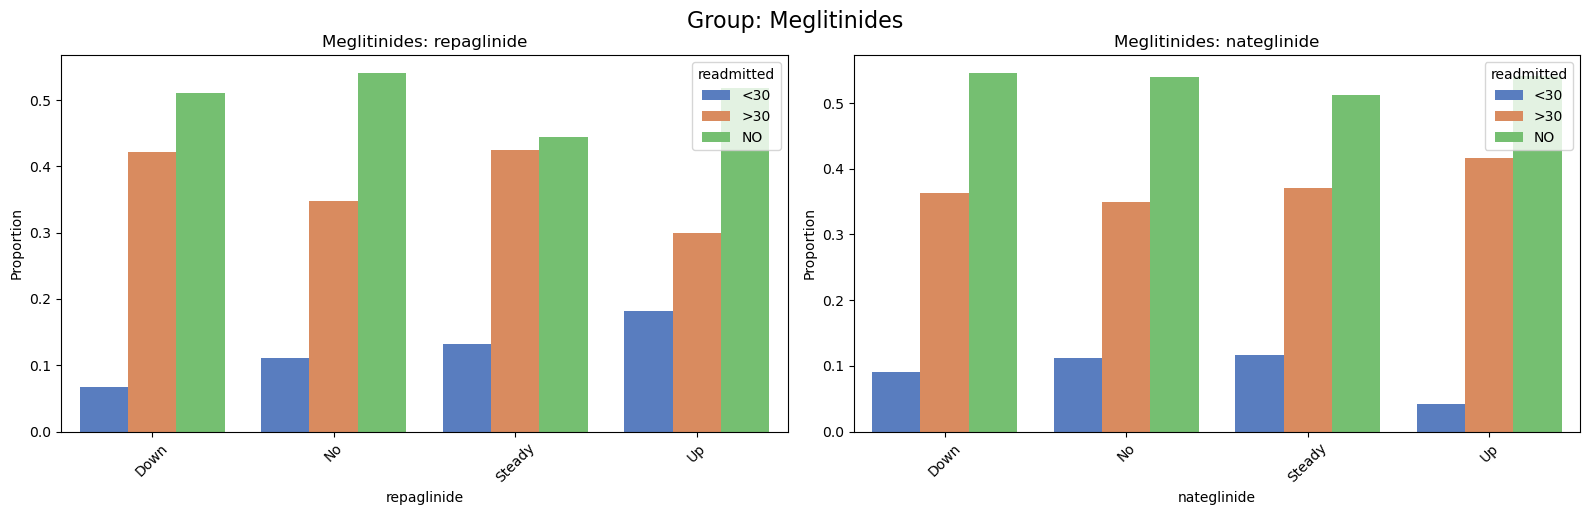

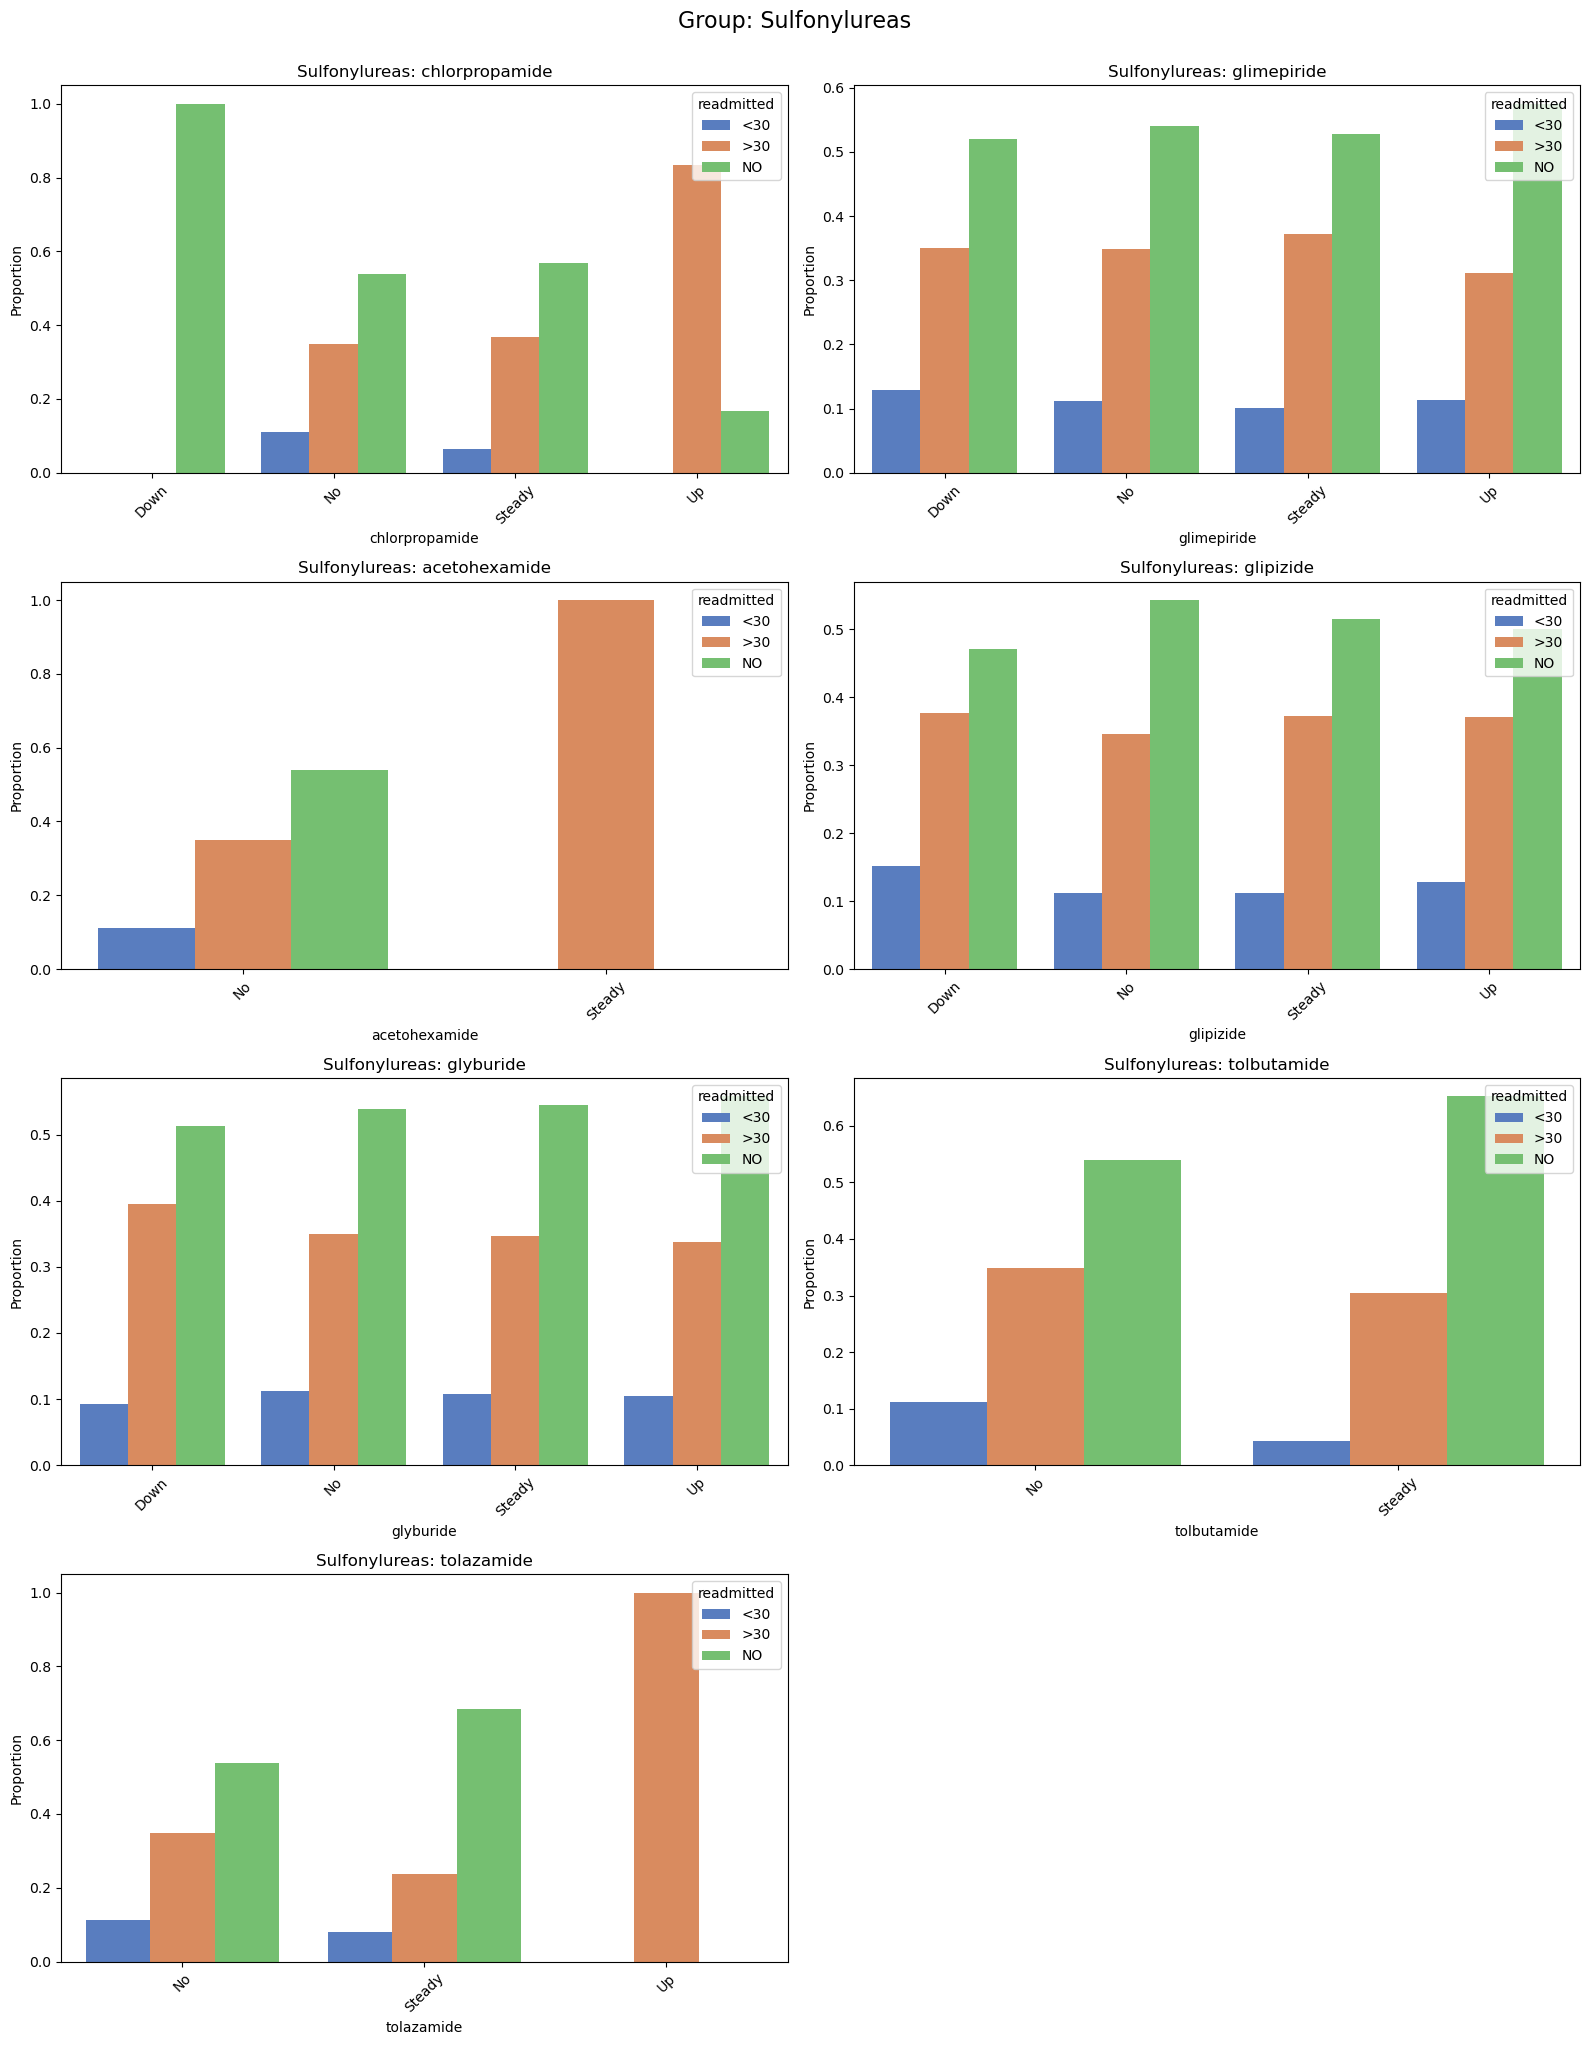

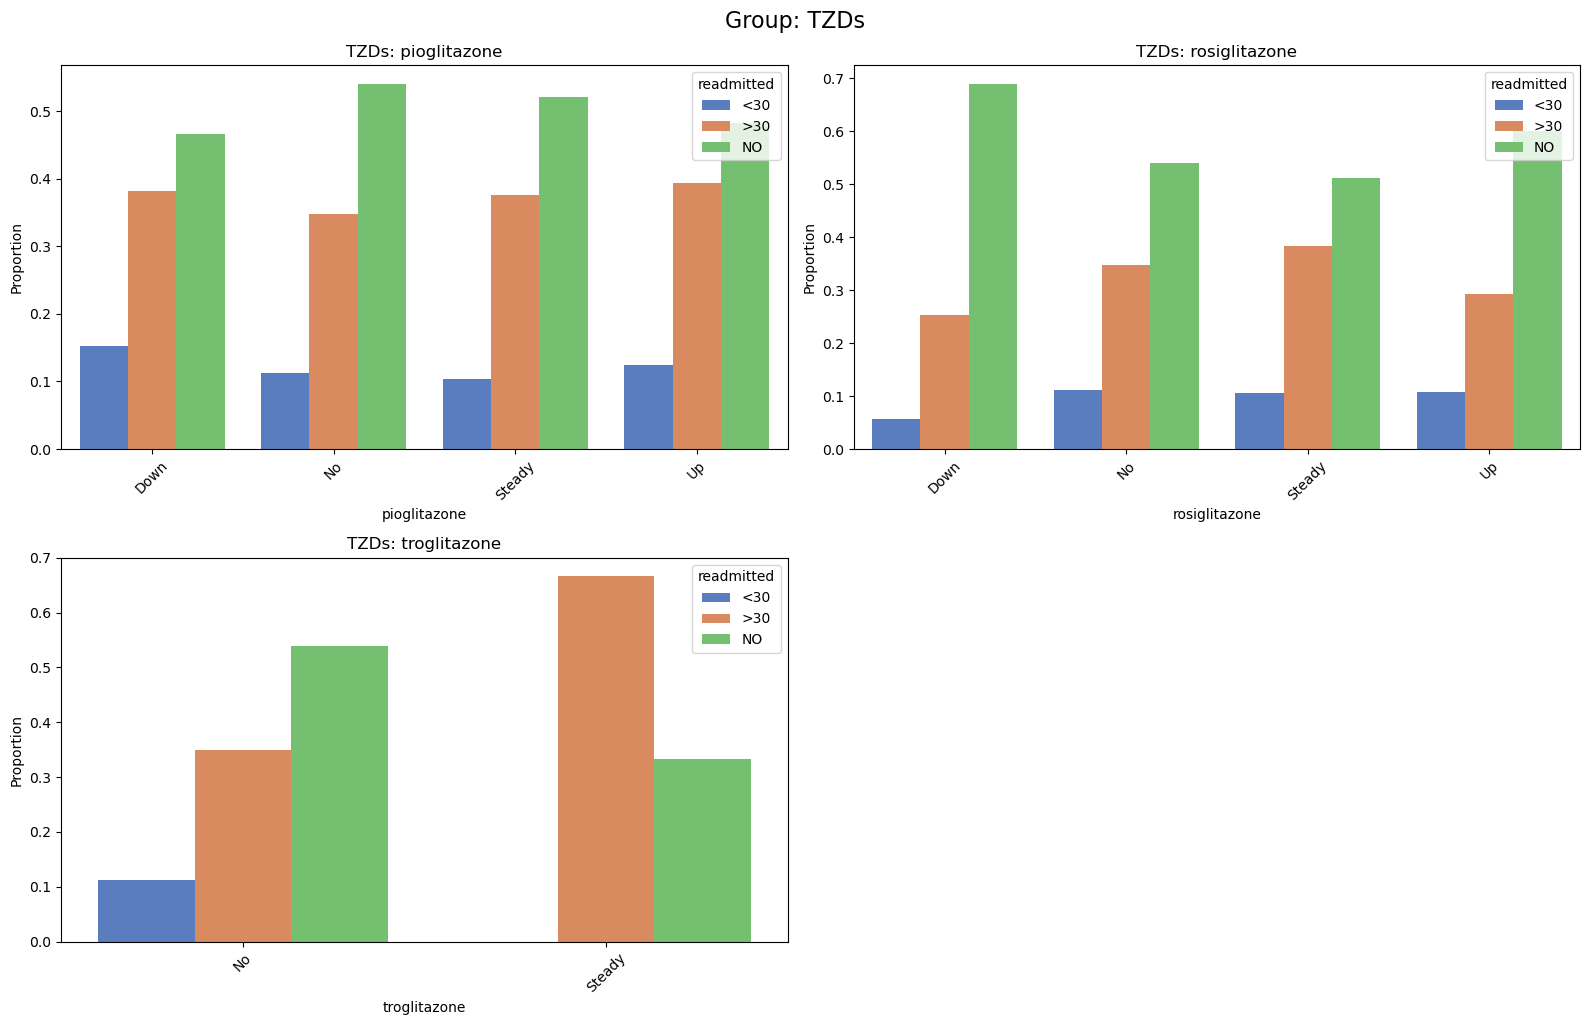

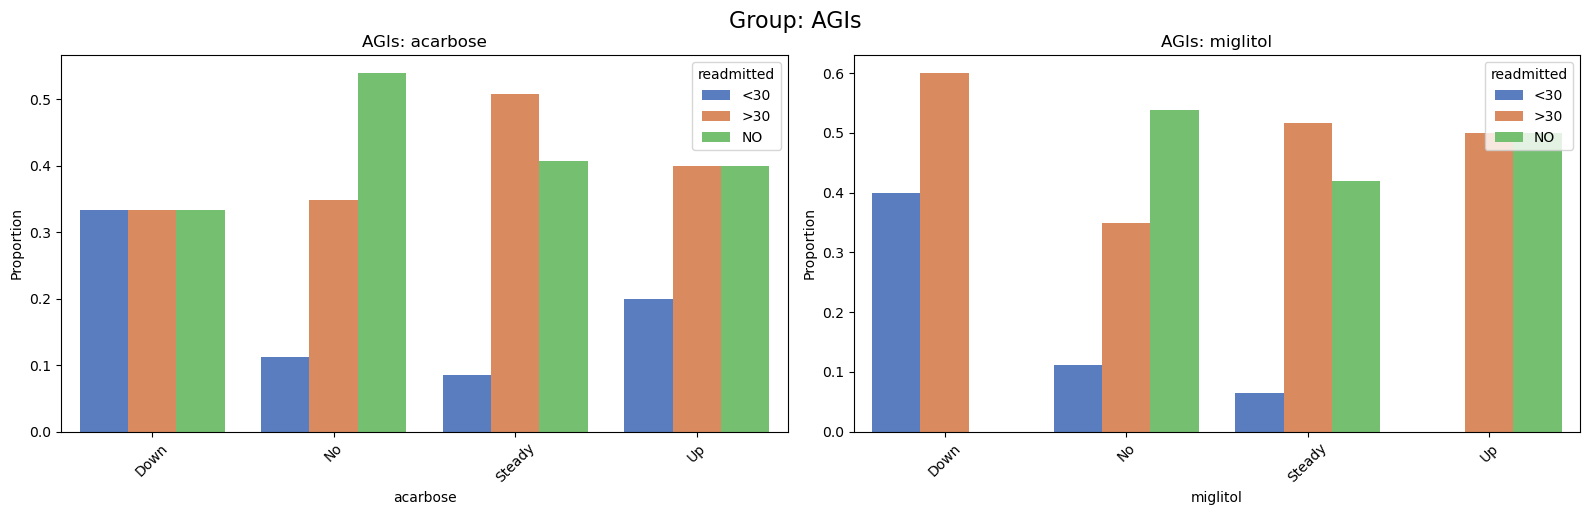

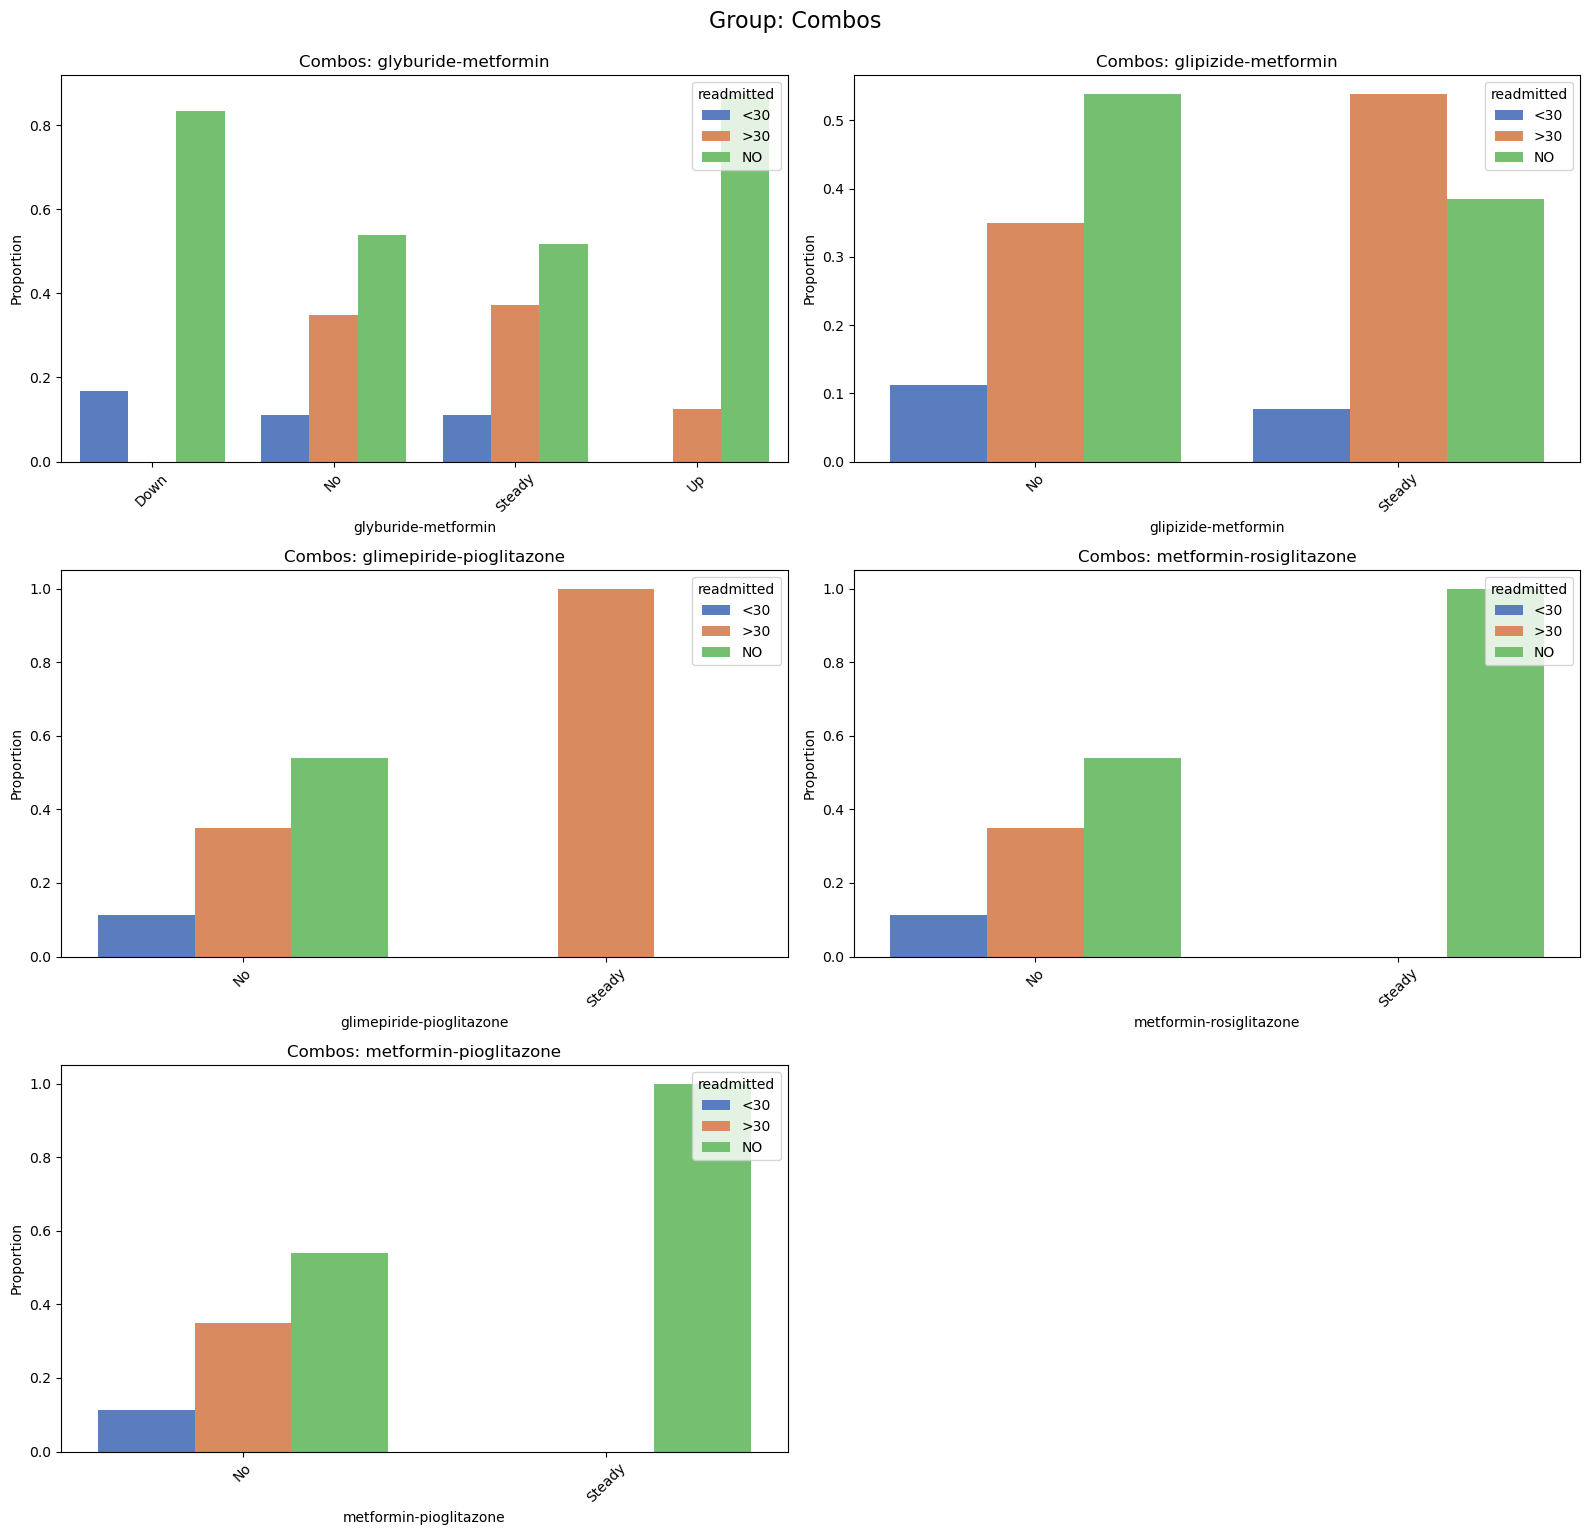

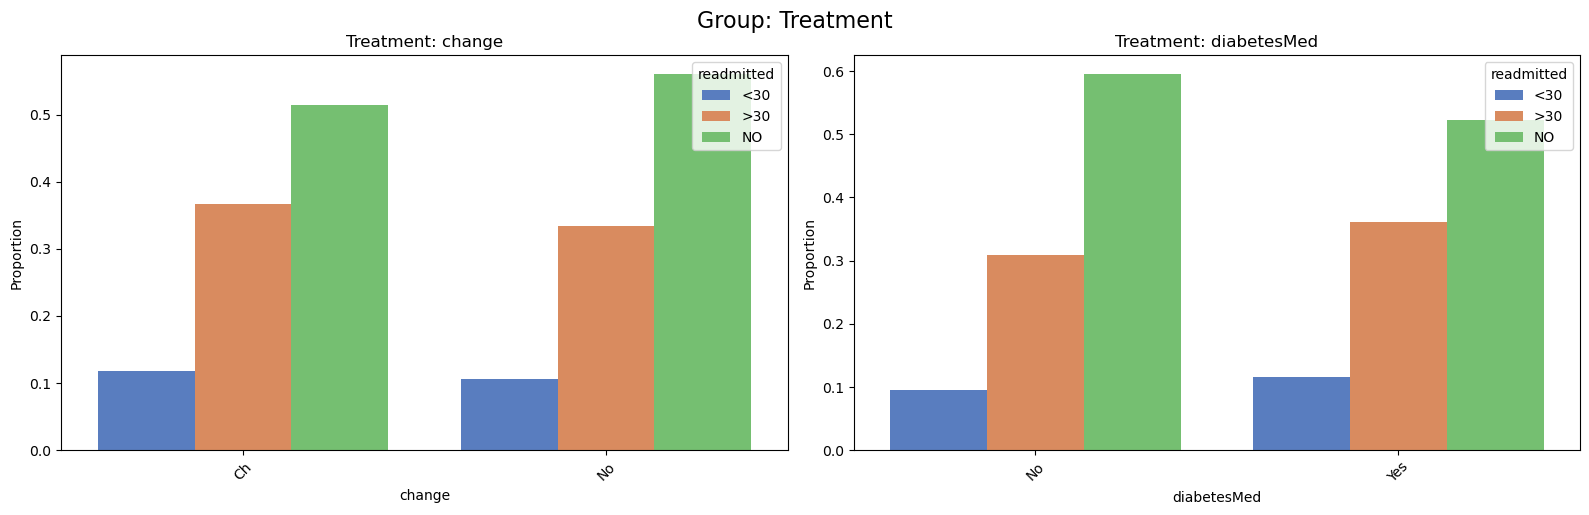

In [134]:
# Ensure the response variable is ordered
readmit_order = ['<30', '>30', 'NO']
df_clean['readmitted'] = pd.Categorical(df_clean['readmitted'], categories=readmit_order, ordered=True)

# Set the color palette
palette = sns.color_palette("muted", n_colors=len(readmit_order))

def calculate_proportions(df, catvar, response):
    """
    Calculate proportions of response classes for each level of a categorical variable.
    """
    # Count occurrences of each combination of catvar and response
    counts = df.groupby([catvar, response], observed=False).size().reset_index(name='count')
    
    # Calculate proportions within each level of the categorical variable
    counts['proportion'] = counts.groupby(catvar, observed=False)['count'].transform(lambda x: x / x.sum())
    
    return counts

def plot_categorical_proportions(df, groups, response, ncols=2, top_n=12):
    """
    Create bar plots of proportions for categorical variables by response class.
    """
    for group_name, variables in groups.items():
        # Number of rows needed
        nrows = -(-len(variables) // ncols)  # Ceiling division
        
        # Create subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 5))
        axes = axes.flatten()  # Flatten axes for easy iteration
        
        # Plot each variable in the group
        for i, var in enumerate(variables):
            if var in df.columns:  # Check if variable exists in DataFrame
                # Calculate proportions
                proportions = calculate_proportions(df, var, response)
                
                # Limit to top_n categories by total count
                top_categories = proportions.groupby(var, observed=False)['count'].sum().nlargest(top_n).index
                plot_data = proportions[proportions[var].isin(top_categories)]
                
                # Bar plot
                sns.barplot(
                    data=plot_data,
                    x=var,
                    y='proportion',
                    hue=response,
                    palette=palette,
                    ax=axes[i]
                )
                axes[i].set_title(f'{group_name}: {var}', fontsize=12)
                axes[i].set_ylabel('Proportion')
                axes[i].set_xlabel(var)
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].legend(title=response, loc='upper right')
            else:
                axes[i].set_visible(False)  # Hide empty plots
        
        # Hide unused axes
        for j in range(len(variables), len(axes)):
            axes[j].set_visible(False)
        
        # Adjust layout
        plt.tight_layout()
        plt.suptitle(f'Group: {group_name}', fontsize=16, y=1.02)  # Add a super title
        # plt.savefig(f'plots/plot_{group_name}_by_readmitted.png')
        plt.show()

# Grouping categorical variables for plotting
groups = {
    "Demographics": ['race', 'gender', 'age', 'weight'], # excluded patient_nbr
    "Administrative": ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty'],
    "Diagnoses": ['diag_1', 'diag_2', 'diag_3'],
    "Tests": ['max_glu_serum', 'A1Cresult'],
    "FirstLineDrugs": ['insulin', 'metformin'],
    "Meglitinides": ['repaglinide', 'nateglinide'],
    "Sulfonylureas": ['chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide'],
    "TZDs": ['pioglitazone', 'rosiglitazone', 'troglitazone'],
    "AGIs": ['acarbose', 'miglitol'],
    "Combos": ['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'],
    "Treatment": ['change', 'diabetesMed']
}

# Call the function to create bar plots
plot_categorical_proportions(df_clean, groups, response='readmitted', ncols=2, top_n=12)


- Comparing the trends between the response classes across categorical levels, there are no stand-out examples of class separation between levels. We also need to bear in mind that many of these features have a large imbalance in their categorical levels (e.g. many of the drug variables). However, there are some differences where it looks like feature level may be associate with response class. Examples include:
  - race
  - admission_type_id
  - discharge_disposition_id
  - admission_source_id
  - payer_code
  - medical_specialty
  - diag_1, diag_2, diag_3
  - max_glu_serum
  - nearly all the drug variablesi
  - change
  - diabetesMed

#### Feature Selection

Here, we want to do some feature selection to help get a sense of the most important features. First we start by preprocessing categorical features, ordering the ordinal ones and then one-hot encoding. 

In [135]:
# Preprocessing and dataset checks for LASSO feature selection
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a copy of df_clean to avoid modifying the original dataframe
df_encoded = df_clean.copy()

# Define the order for drug variables
drug_order = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}

# List of drug-related variables
drug_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide', 
                'pioglitazone', 'rosiglitazone', 'troglitazone', 'acarbose', 'miglitol', 
                'insulin', 'glyburide-metformin', 'glipizide-metformin',
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'glimepiride-pioglitazone']

# Apply the ordinal mapping to drug variables
for col in drug_columns:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(drug_order)

# Define the order for age ranges
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
             '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Encode the age ranges as ordinal
df_encoded['age'] = pd.Categorical(df_encoded['age'], categories=age_order, ordered=True).codes

# Preprocess diag_1, diag_2, diag_3 combining all 
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_encoded[col] = df_encoded[col].str.split('.').str[0]  # Drop decimals and digits after
# Group less frequent categories into other
for col in ['diag_1', 'diag_2', 'diag_3']:
    top_categories = df_encoded[col].value_counts().nlargest(20).index
    df_encoded[col] = df_encoded[col].apply(lambda x: x if x in top_categories else 'Other')

# Replace NaNs in 'medical_specialty' and 'payer_code' with 'unknown'
categorical_na_columns = ['medical_specialty', 'payer_code']
for col in categorical_na_columns:
    df_encoded[col] = df_encoded[col].fillna('unknown')

# Drop highly missing columns
columns_to_drop = ['patient_nbr', 'weight', 'max_glu_serum', 'A1Cresult']
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Check for remaining missing values
# print("Missing values before dropping rows:")
# print(df_encoded.isnull().sum())

# Drop rows with NaN values
df_encoded = df_encoded.dropna()
# Or impute them with the mode (or use KNN imputer)
# for col in ['diag_1', 'diag_2', 'race']:
#     df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])

# Ensure the dataframe still has rows
if df_encoded.shape[0] == 0:
    raise ValueError("No rows left after dropping NaNs. Consider imputing missing values instead.")

# Check the shape of the final dataset
# print(f"Shape after preprocessing: {df_encoded.shape}")

# Define predictors (X) and response (y)
X = df_encoded.drop(columns=['readmitted'])  # Exclude the target variable
y = df_encoded['readmitted'].cat.codes  # Encode the target variable as 0, 1, 2

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing to X
X_preprocessed = preprocessor.fit_transform(X)

# Check the shape of the preprocessed dataset
print(f"Preprocessed dataset shape: {X_preprocessed.shape}")


Preprocessed dataset shape: (99493, 233)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=1234)

# Fit LASSO logistic regression (LogisticRegressionCV with L1 penalty)
lasso = LogisticRegressionCV(
    penalty='l1',  # LASSO penalty
    solver='saga',  # Supports L1 regularization
    Cs=np.logspace(-3, 3, 20),  # Lambda values (inverse of regularization strength)
    cv=5,  # 5-fold cross-validation
    scoring='neg_log_loss',  # Metric: log loss
    random_state=1234,
    max_iter=5000,
    n_jobs=-1 #Use all CPU cores
)

lasso.fit(X_train, y_train)

# Extract the best lambda (C is the inverse of lambda)
best_lambda = 1 / lasso.C_[0]
print(f"Best lambda (penalty strength): {best_lambda}")

# Extract the feature names
feature_names = (
    list(numeric_features) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Extract the coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLASSO Coefficients:")
print(coefficients)

# Identify features not pushed to zero
selected_features = coefficients[coefficients['Coefficient'] != 0]
print("\nSelected Features (Non-zero Coefficients):")
print(selected_features)

# Evaluate the LASSO model
y_pred = lasso.predict(X_test)
y_pred_proba = lasso.predict_proba(X_test)

print("\nModel Evaluation:")
print(f"Log Loss: {log_loss(y_test, y_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


In [ ]:
import re

# Separate numerical features before processing categorical ones
numeric_features = coefficients['Feature'][coefficients['Feature'].isin(X.select_dtypes(include=['int64', 'float64']).columns)]
categorical_features = coefficients['Feature'][~coefficients['Feature'].isin(numeric_features)]

# Apply regex to remove one-hot encoding suffixes only for categorical features
original_features = categorical_features.str.replace(r'_[^_]+$', '', regex=True)

# Combine the cleaned categorical features with the numerical features
unique_features = pd.concat([numeric_features, original_features]).unique()

print("Unique Original Features:")
print(unique_features)

# List of features in the dataset (from preprocessing)
dataset_features = X.columns

# Cleaned unique features (from LASSO coefficients)
lasso_unique_features = pd.Series(unique_features)

# Find common features
common_features = lasso_unique_features[lasso_unique_features.isin(dataset_features)]

# Find features in the dataset but not selected by LASSO
unused_features = pd.Series(dataset_features[~dataset_features.isin(lasso_unique_features)])

# # Print results
# print("Common Features (Selected by LASSO and Present in Dataset):")
# print(common_features)

print("\nUnused Features (Present in Dataset but NOT Selected by LASSO):")
print(unused_features)

Penalized regression with LASSO only removes age.  

Next we will try Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Combine feature names and importances
# Retrieve feature names from the preprocessor
numeric_features = list(numeric_features)
categorical_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out())

all_feature_names = numeric_features + categorical_features

# Ensure the lengths match
if len(all_feature_names) != len(importances):
    raise ValueError(f"Mismatch between feature names ({len(all_feature_names)}) and importances ({len(importances)}).")

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importances)

# Set a threshold for importance (e.g., remove features with very low importance)
threshold = 0.01  # Keep features with importance > 1%
selected_features = feature_importances[feature_importances['Importance'] > threshold]

print("\nSelected Features:")
print(selected_features)

# Filter X_train and X_test based on selected features
selected_indices = selected_features.index
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]



In [ ]:
import re

# Retrieve feature names from the preprocessor
# For categorical features, OneHotEncoder creates feature names based on categories
categorical_features_rf = preprocessor.named_transformers_['cat'].get_feature_names_out()
numeric_features_rf = list(numeric_features)

# Combine numeric and categorical feature names
all_feature_names_rf = numeric_features_rf + list(categorical_features_rf)

# Ensure the lengths match with the importance values
if len(all_feature_names_rf) != len(importances):
    raise ValueError(f"Mismatch between feature names ({len(all_feature_names_rf)}) and importances ({len(importances)}).")

# Map selected feature indices back to their names
selected_features_rf = feature_importances[feature_importances['Importance'] > threshold]
selected_feature_indices = selected_features_rf.index
selected_feature_names = [all_feature_names_rf[i] for i in selected_feature_indices]

# Separate numerical and categorical selected features
selected_numeric_features = [feature for feature in selected_feature_names if feature in numeric_features_rf]
selected_categorical_features = [feature for feature in selected_feature_names if feature not in numeric_features_rf]

# Apply regex to clean one-hot encoded names for categorical features only
cleaned_selected_categorical_features = [re.sub(r'_[^_]+$', '', feature) for feature in selected_categorical_features]

# Combine cleaned categorical features with numeric features
unique_selected_features = pd.Series(selected_numeric_features + cleaned_selected_categorical_features).unique()

print("Unique Original Features from Random Forest:")
print(unique_selected_features)

# Compare with dataset features
dataset_features_rf = list(X.columns)

# Find common features
common_rf_features = [feature for feature in unique_selected_features if feature in dataset_features_rf]

# Find unused features in the dataset
unused_rf_features = [feature for feature in dataset_features_rf if feature not in unique_selected_features]

# Print results
print("\nCommon Features (Selected by Random Forest and Present in Dataset):")
print(common_rf_features)

print("\nUnused Features (Present in Dataset but NOT Selected by Random Forest):")
print(unused_rf_features)


The important variables change a bit when this is run. It might be worth running it a few times and comparing variable importance.

##### *Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.*

In [ ]:
# Filter diag_1 to include only categories with more than 1000 occurrences
diag_1_top_values = df_clean['diag_1'].value_counts()
diag_1_top_values = diag_1_top_values[diag_1_top_values > 1000].index
df_clean['diag_1_limited'] = df_clean['diag_1'].where(df_clean['diag_1'].isin(diag_1_top_values), other='Other')

# Define numeric and categorical variables
numVar = ['time_in_hospital', 'num_procedures', 'number_emergency']
catVar = ['payer_code', 'diag_1_limited', 'glipizide', 'discharge_disposition_id']

# Define the order for 'readmitted' categories
readmit_order = ['<30', '>30', 'NO']

# Rearrange the dataset based on the desired order of 'readmitted'
df_clean['readmitted'] = pd.Categorical(df_clean['readmitted'], categories=readmit_order, ordered=True)

# Horizontal Boxplots for Numeric Variables in Two Columns
ncols = 2  # Number of columns in the grid
nrows = -(-len(numVar) // ncols)  # Calculate the number of rows needed (ceiling division)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))  # Adjust size for clarity
axes = axes.flatten()  # Flatten axes for easier indexing if nrows * ncols > len(numVar)

for i, var in enumerate(numVar):
    ax = axes[i]  # Get the appropriate subplot axis
    # Prepare data for boxplot
    data = [group[var].dropna() for _, group in df_clean.groupby('readmitted', observed=True)]
    # Create horizontal boxplot with custom colors
    bp = ax.boxplot(data, vert=False, patch_artist=True, tick_labels=readmit_order)
    colors = sns.color_palette("muted", len(readmit_order))  # Define the color palette
    for patch, color in zip(bp['boxes'], colors):  # Color each box
        patch.set_facecolor(color)
    for median in bp['medians']:  # Color medians black for contrast
        median.set_color("black")
    ax.set_title(f'Boxplot of {var} by Readmitted')
    ax.set_xlabel(var)
    ax.set_ylabel('Readmitted')

# Hide any unused subplots if the number of variables is less than nrows * ncols
for j in range(len(numVar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# plt.savefig(f'plots/grouped_boxplots.png')
plt.show()

# Grouped Barplots for Categorical Variables in Two Columns
ncols = 2  # Number of columns in the grid
nrows = -(-len(catVar) // ncols)  # Calculate the number of rows needed (ceiling division)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))  # Adjust size for clarity
axes = axes.flatten()  # Flatten axes for easier indexing if nrows * ncols > len(catVar)

for i, var in enumerate(catVar):
    ax = axes[i]  # Get the appropriate subplot axis
    # Calculate proportions of response classes within each level of the categorical variable
    grouped_counts = (
        df_clean.groupby(var, observed=True)['readmitted']
        .value_counts(normalize=True)  # Normalize within each category of var
        .unstack(fill_value=0) * 100  # Convert to percentages
    )

    # Plot grouped barplot
    grouped_counts[readmit_order].plot(
        kind='bar', ax=ax, width=0.8, color=sns.color_palette("muted"), edgecolor='black'
    )
    ax.set_title(f'Grouped Barplot of {var} by Readmitted')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Readmitted')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots if the number of variables is less than nrows * ncols
for j in range(len(catVar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# plt.savefig(f'plots/grouped_barplots.png')
plt.show()

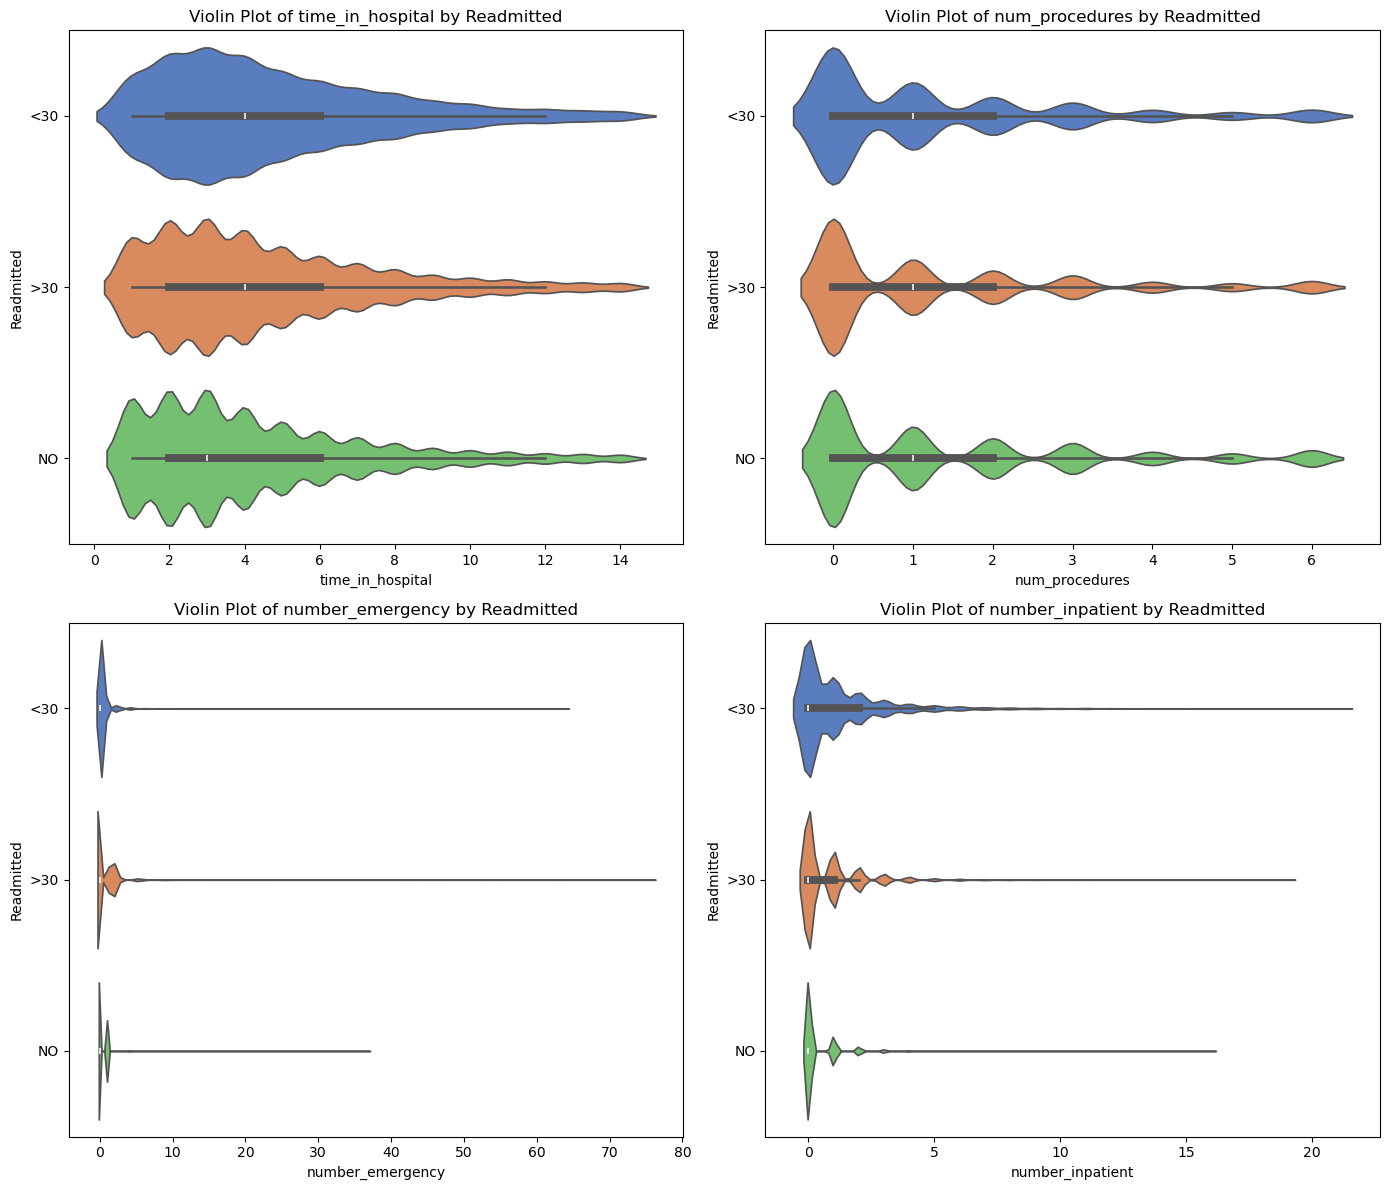

KeyError: 'diag_1_limited'

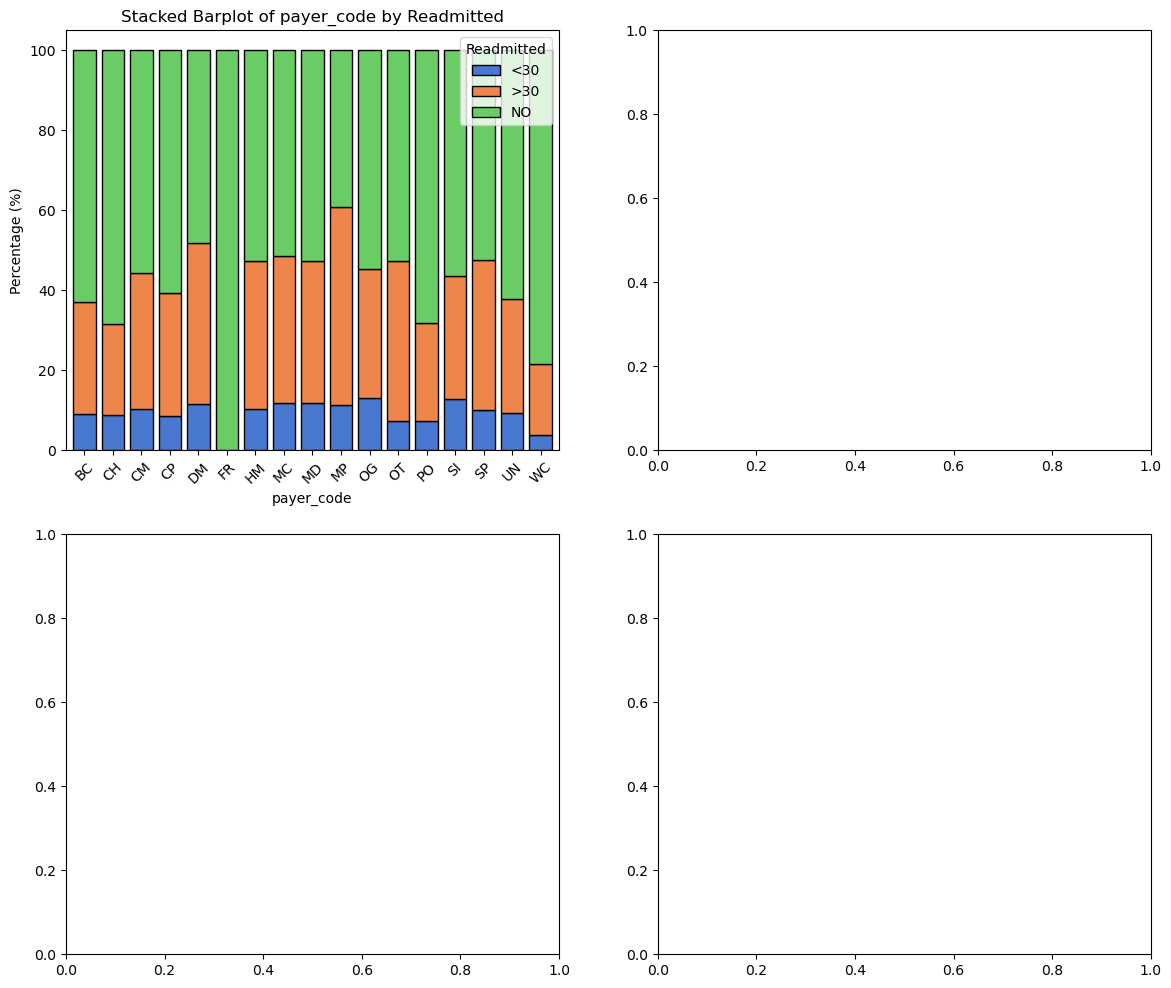

In [97]:
# Define numeric and categorical variables
numVar = ['time_in_hospital', 'num_procedures', 'number_emergency', 'number_inpatient']
catVar = ['payer_code', 'diag_1_limited', 'glipizide', 'discharge_disposition_id']

# Define the order for 'readmitted' categories
readmit_order = ['<30', '>30', 'NO']

# Rearrange the dataset based on the desired order of 'readmitted'
df_clean['readmitted'] = pd.Categorical(df_clean['readmitted'], categories=readmit_order, ordered=True)

# Violin Plots for Numeric Variables in Two Columns
ncols = 2  # Number of columns in the grid
nrows = -(-len(numVar) // ncols)  # Calculate the number of rows needed (ceiling division)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))  # Adjust size for clarity
axes = axes.flatten()  # Flatten axes for easier indexing if nrows * ncols > len(numVar)

for i, var in enumerate(numVar):
    ax = axes[i]  # Get the appropriate subplot axis
    sns.violinplot(
        data=df_clean, 
        x=var, 
        y='readmitted', 
        hue = 'readmitted',
        order=readmit_order,
        palette='muted', 
        ax=ax
    )
    ax.set_title(f'Violin Plot of {var} by Readmitted')
    ax.set_xlabel(var)
    ax.set_ylabel('Readmitted')

# Hide any unused subplots
for j in range(len(numVar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# plt.savefig(f'plots/grouped_violinplots.png')
plt.show()

# Stacked Barplots for Categorical Variables in Two Columns
ncols = 2  # Number of columns in the grid
nrows = -(-len(catVar) // ncols)  # Calculate the number of rows needed (ceiling division)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))  # Adjust size for clarity
axes = axes.flatten()  # Flatten axes for easier indexing if nrows * ncols > len(catVar)

for i, var in enumerate(catVar):
    ax = axes[i]  # Get the appropriate subplot axis
    # Calculate proportions of response classes within each level of the categorical variable
    grouped_counts = (
        df_clean.groupby(var, observed=True)['readmitted']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )
    # Plot stacked barplot
    grouped_counts[readmit_order].plot(
        kind='bar', 
        stacked=True, 
        ax=ax, 
        color=sns.color_palette("muted"), 
        edgecolor='black',
        width=0.8
    )
    ax.set_title(f'Stacked Barplot of {var} by Readmitted')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Readmitted', loc='upper right')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(catVar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# plt.savefig(f'plots/stacked_barplots.png')
plt.show()


##### *Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

/var/folders/xc/xy2drgvd7_18v0mjfy9sz8mc0000gn/T/ipykernel_15597/3925675254.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('readmitted', group_keys=False)
/var/folders/xc/xy2drgvd7_18v0mjfy9sz8mc0000gn/T/ipykernel_15597/3925675254.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1))


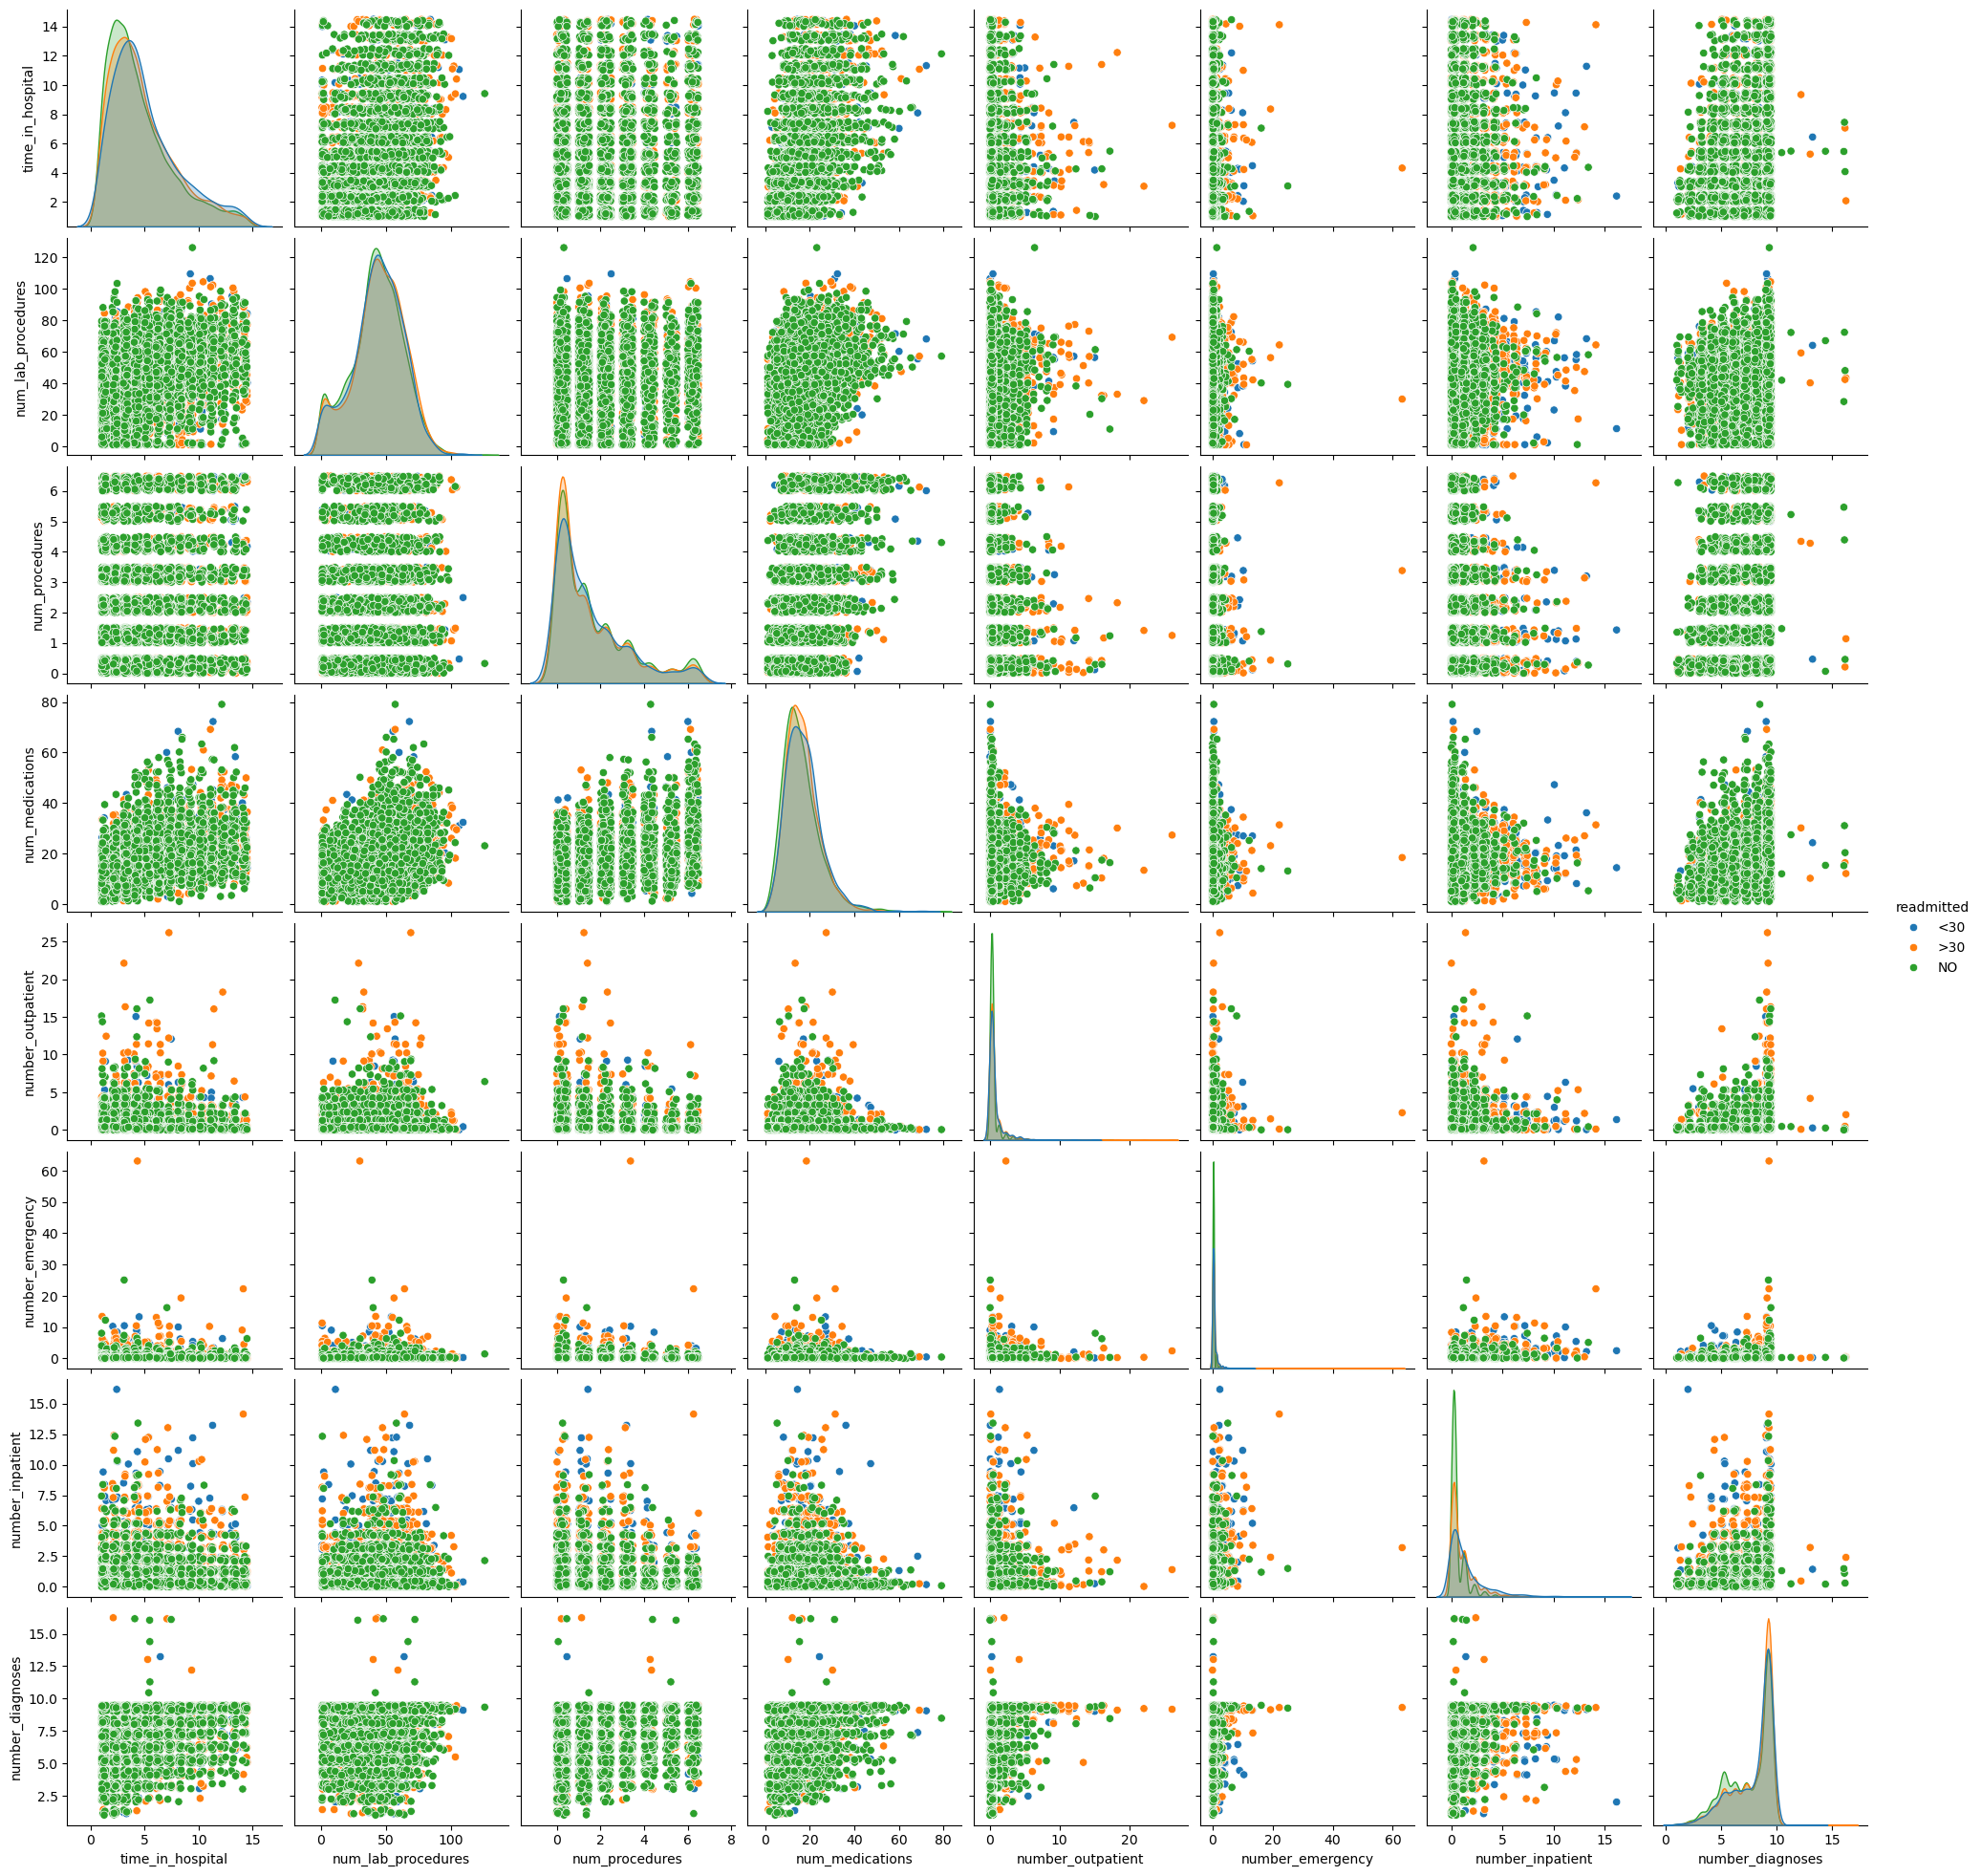

In [45]:
# Scatter plot matrix of the numeric variables

# Sample 10% of the 100K record dataset
sample_size = int(0.1 * len(df_clean))

# Perform stratified sampling  to ensure all 'readmitted' classes are represented and reset the index
df_sampled = (
    df_clean.groupby('readmitted', group_keys=False)
    .apply(lambda x: x.sample(frac=0.1))
    .reset_index(drop=True)
)

# Ensure the 'readmitted' column is present explicitly
df_sampled = df_sampled.loc[:, df_clean.columns]

# Add jitter to numeric variables
df_sampled_jittered = df_sampled.copy()
numeric_cols = df_sampled.select_dtypes(include=['int64']).columns

df_sampled_jittered[numeric_cols] = df_sampled_jittered[numeric_cols].values + \
    np.random.rand(len(df_sampled_jittered), len(numeric_cols)) / 2

# Create the pairplot
sns.pairplot(
    data=df_sampled_jittered,
    hue="readmitted",          # Group by 'readmitted'
    diag_kws={"common_norm": False}, # Default ensures densities are group-specific    
);
# plt.savefig(f'plots/matrixScatter.png')


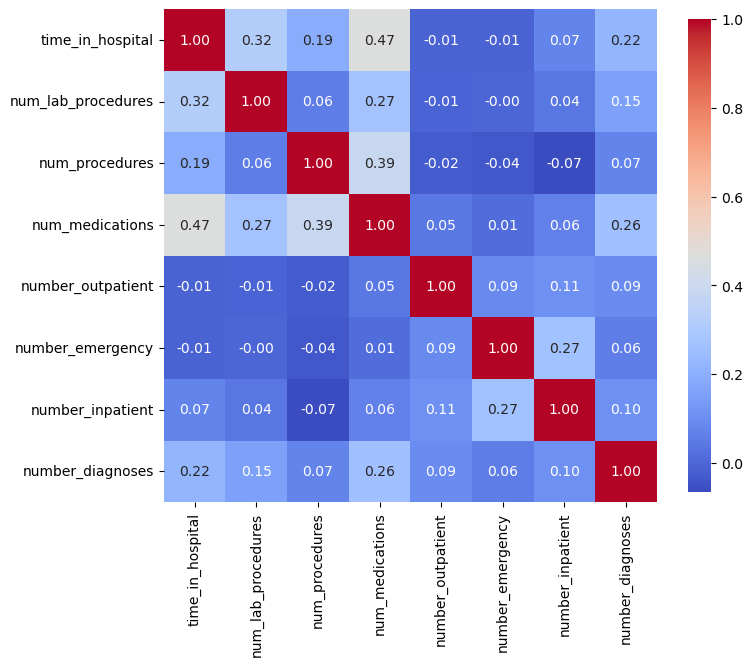

In [46]:
# Select only numeric columns for the correlation matrix
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the plot
f, ax = plt.subplots(figsize=(8, 8))  # Figure and axes
sns.heatmap(corr_matrix,
            annot=True,         # Plot numeric annotations
            fmt=".2f",          # Format for annotations
            square=True,        # Keep cells square
            cmap=sns.color_palette("coolwarm", as_cmap=True),
            cbar_kws={"shrink": 0.7},  # Colorbar customization
            ax=ax)              # Use the same axis

# Adjust layout
f.tight_layout()
# plt.savefig(f'plots/correlationplt.png')
plt.show()

##### *Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

##### *Are there other features that could be added to the data or created from existing features? Which ones?*

Some options for combining features for simplicity are to group drugs by classes, group diagnosis codes by health category (e.g. cardiovascular, endocrine, etc.). Variables with many categorical levels could be reorganized to group sparce levels into an other category (e.g. payer_code, medical_specialty, and discharge_disposition_id). Another option to consider would be restricting the analysis to adults over 20 years old. The dataset primarily consists of adults and it seems logical that the disease, treatments and outcomes of children might be different than adults.

#### One Hot Encoding and Dimensionality Reduction

##### *Additional analyses (e.g. implement dimensionality reduction, then visualize and interpret the results).*

In [47]:
# Remove columns with many missing values and patient IDs
columns_to_drop = ['patient_nbr', 'weight', 'max_glu_serum', 'A1Cresult']
df_encoded = df_clean.drop(columns=columns_to_drop)

# Preprocess diag_1, diag_2, diag_3 combining all 
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_encoded[col] = df_encoded[col].str.split('.').str[0]  # Drop decimals and digits after
# print(df_encoded[['diag_1', 'diag_2', 'diag_3']].head(20))

# Replace NaNs in 'medical_specialty' and 'payer_code' with 'unknown'
categorical_na_columns = ['medical_specialty', 'payer_code']
for col in categorical_na_columns:
    df_encoded[col] = df_encoded[col].fillna('unknown')

# Drop rows with NaN values (race and diagnoses cols)
df_encoded = df_encoded.dropna()

# Remove target (split into X and y, for plotting with y later)
X_df_encoded = df_encoded.drop(columns='readmitted')

readmit_order = ['<30', '>30', 'NO']
y_df_encoded = pd.Categorical(df_encoded['readmitted'], categories=readmit_order, ordered=True)

# Handle categorical variables with one-hot encoding
categorical_columns = X_df_encoded.select_dtypes(include=['object', 'category']).columns
X_df_encoded = pd.get_dummies(X_df_encoded, columns=categorical_columns, drop_first=False)

# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df_encoded)

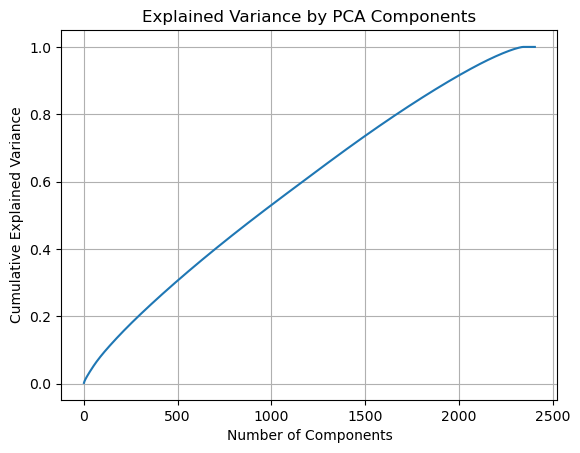

In [48]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
# plt.savefig(f'plots/PCAexplainedVariance.png')
plt.show()

In [49]:
# Determine the number of components to explain ~80% of variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # +1 because indices start at 0
print(f"Number of original features: {X_df_encoded.shape[1]}\nNumber of components to explain ~80% of variance: {n_components_80}")

Number of original features: 2405
Number of components to explain ~80% of variance: 1668


/var/folders/xc/xy2drgvd7_18v0mjfy9sz8mc0000gn/T/ipykernel_15597/1193229984.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Readmitted')


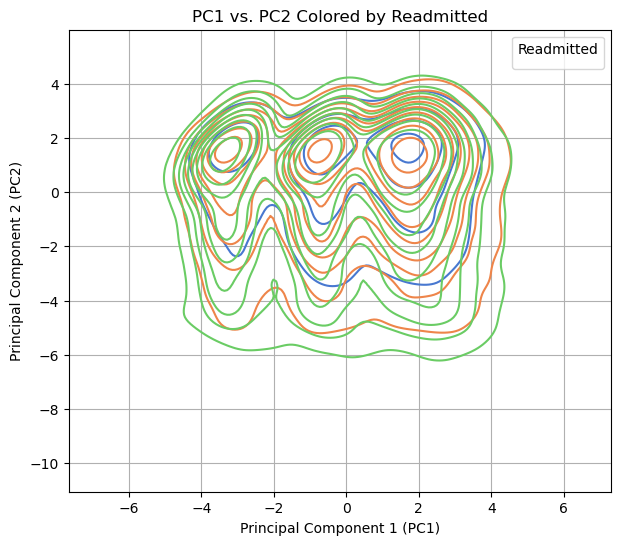

In [50]:
# Plot PC1 vs PC2 by response class

pc1 = X_pca[:, 0]  # First principal component
pc2 = X_pca[:, 1]  # Second principal component

pca_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Readmitted': y_df_encoded
})

plt.figure(figsize=(7, 6))
# sns.scatterplot(
#     data=pca_df,
#     x='PC1',
#     y='PC2',
#     hue='Readmitted',
#     palette='muted',
#     alpha=0.7
# )
sns.kdeplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Readmitted',
    palette='muted')
plt.title('PC1 vs. PC2 Colored by Readmitted')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Readmitted')
plt.grid(True)
# plt.savefig(f'plots/PC1vPC2_by_readmitted.png')
plt.show()


#### Group drugs into categories for simplicity.

In [51]:
# This isn't working yet...
df_drug_by_class = df_clean.copy()

# Define drug classes
drug_classes = {
    'Metformin': ['metformin'],
    'Meglitinides': ['repaglinide', 'nateglinide'],
    'Sulfonylureas': ['chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide'],
    'TZDs': ['pioglitazone', 'rosiglitazone', 'troglitazone'],
    'AGIs': ['acarbose', 'miglitol'],
    'Insulin': ['insulin'],
    'Sulfonylureas_Metformin': ['glyburide-metformin', 'glipizide-metformin'], 
    'TZDs_Metformin': ['metformin-rosiglitazone', 'metformin-pioglitazone'],
    'Sulfonylureas_TZDs': ['glimepiride-pioglitazone']
}

# Create columns for each drug class
for class_name, drugs in drug_classes.items():
    # Check the status of all drugs in the class for each patient
    df_drug_by_class[class_name] = df_clean[drugs].apply(
        lambda row: 'up' if 'up' in row.values else
                    'down' if 'down' in row.values else
                    'stable' if 'stable' in row.values else
                    'no', axis=1
    )

# Confirm no patient is taking multiple drugs in a class with conflicting statuses
for class_name, drugs in drug_classes.items():
    df_drug_by_class[f'{class_name}_conflict'] = df_drug_by_class[drugs].nunique(axis=1) > 1

# View the result
df_drug_by_class.head()


patient_nbr             race  gender      age weight admission_type_id  \
0     8222157        Caucasian  Female   [0-10)    NaN                 6   
1    55629189        Caucasian  Female  [10-20)    NaN                 1   
2    86047875  AfricanAmerican  Female  [20-30)    NaN                 1   
3    82442376        Caucasian    Male  [30-40)    NaN                 1   
4    42519267        Caucasian    Male  [40-50)    NaN                 1   

  discharge_disposition_id admission_source_id  time_in_hospital payer_code  \
0                       25                   1                 1        NaN   
1                        1                   7                 3        NaN   
2                        1                   7                 2        NaN   
3                        1                   7                 2        NaN   
4                        1                   7                 1        NaN   

   ... Sulfonylureas_TZDs  Metformin_conflict  Meglitinides_conflict  \
0  ...                 no               False                  False   
1  ...                 no               False                  False   
2  ...                 no               False                  False   
3  ...                 no               False                  False   
4  ...                 no               False                  False   

   Sulfonylureas_conflict  TZDs_conflict  AGIs_conflict  Insulin_conflict  \
0                   False          False          False             False   
1                   False          False          False             False   
2                    True          False          False             False   
3                   False          False          False             False   
4                    True          False          False             False   

  Sulfonylureas_Metformin_conflict TZDs_Metformin_conflict  \
0                            False                   False   
1                            False                   False   
2                            False                   False   
3                            False                   False   
4                            False                   False   

  Sulfonylureas_TZDs_conflict  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  

[5 rows x 66 columns]

In [52]:
# Drop the individual drug columns
columns_to_drop = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'tolazamide', 'pioglitazone', 'rosiglitazone', 'troglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'glimepiride-pioglitazone']
df_drug_by_class = df_drug_by_class.drop(columns=columns_to_drop)
df_drug_by_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   patient_nbr                       101766 non-null  category
 1   race                              99493 non-null   object  
 2   gender                            101766 non-null  object  
 3   age                               101766 non-null  object  
 4   weight                            3197 non-null    object  
 5   admission_type_id                 101766 non-null  category
 6   discharge_disposition_id          101766 non-null  category
 7   admission_source_id               101766 non-null  category
 8   time_in_hospital                  101766 non-null  int64   
 9   payer_code                        61510 non-null   object  
 10  medical_specialty                 51817 non-null   object  
 11  num_lab_procedures                10176

#### Create a data subset to explore the importance of variables with a high proportion of missing values

In [53]:
missing_summary

Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636

In [54]:
# Filter rows with observations for max_glu_serum and A1Cresult
df_subset = df_clean[(~df_clean['max_glu_serum'].isna()) & (~df_clean['A1Cresult'].isna())]

# What is the length of the data subset?
print(f'There are {len(df_subset)} records with glucose and AIC test results.')

# After filtering, how many rows still have missing values
df_subset.isna().sum()[df_subset.isna().sum()!=0]

There are 298 records with glucose and AIC test results.


race                   6
weight               298
payer_code           240
medical_specialty    154
diag_2                 1
diag_3                 3
dtype: int64

In [55]:
# Remove columns with > 5% missing.
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
df_subset = df_subset.drop(columns=columns_to_drop)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 162 to 101088
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   patient_nbr               298 non-null    category
 1   race                      292 non-null    object  
 2   gender                    298 non-null    object  
 3   age                       298 non-null    object  
 4   admission_type_id         298 non-null    category
 5   discharge_disposition_id  298 non-null    category
 6   admission_source_id       298 non-null    category
 7   time_in_hospital          298 non-null    int64   
 8   num_lab_procedures        298 non-null    int64   
 9   num_procedures            298 non-null    int64   
 10  num_medications           298 non-null    int64   
 11  number_outpatient         298 non-null    int64   
 12  number_emergency          298 non-null    int64   
 13  number_inpatient          298 non-null    int64   

In [56]:
# plot max_glu_serum and A1C result split by class of readmittance